## Homework 4 - Nhi Le

#### Submit steps 1-8 for a grade of up to 100 points or submit steps 7 and 8 for a grade of up to 130 points. 

### Instructions (like whiteboard version of 3 March, but with more words) 

1. Choose 3 distributions from 3 different families (they can't all be normal or uniform or beta or whatever). <br> Choosing a dist is the same as choosing a pdf, so let's call them $f_1, f_2, f_3$.    
2. (10 points) From each $f_i$ generate a sample of $n=12$ data points.  Call the samples $dat_1, dat_2, dat_3$.  <br>
Code like this:  **dati = stats.f_i.rvs(..., size = 12)**, where $f_i$ and ... depend on your dist.  
3.  For $dat_1$ use **putaboxonit(x, h, ...)**  to produce an estimate $\hat{f_1}$ of the mother pdf $f_1$. Plot it to see how it looks. Experiment with different choices of $h$ to see how it changes.   Nothing to turn in here, just experiment. <br> 
We did this in class with $n=8$ from $beta(5,2)$. We made 8 calls to **putaboxonit(x, h)**, we got 8 boxes, we plotted them on top of each other and it was a mess, then we ADDED the boxes together and called the result **yout**. The plot of **yout** looked like a distribution; another way to say it is $\hat f =$ **yout** is an estimate of the mother pdf $f$ which was $beta(5,2)$.  Here I'm asking you to produce (and plot) **yout** using $dat_1$ and different values of $h$. Each **yout** is an estimate of your pdf $f_1$.  
4.  (30 points) From your experiments, keep 3 versions of $\hat f_1$:  one where $h$ is too small (undersmoothed, boxes don't overlap much), one where $h$ is too large (oversmoothed, boxes overlap like crazy), and one where $h$ looks just right.  Let's call them $\hat f_1^u, \hat f_1^o, \hat f_1^*$.  Deliver a single plot showing these three curves AND $f_1$ and the data $dat_1$ all together.  Legends are good on plots like these. 
5.  (10 points) Repeat steps 3 and 4 for $dat_2$ and $f_2$. 
6.  (10 points) Repeat steps 3 and 4 for $dat_3$ and $f_3$. 
7.  (30 points) Repeat steps 2 - 6 with $n=40$ instead of $n=12$.  
8.  (10 points) There's no reason we have to use boxes;  all of this could work with a different shape.  Think a little and write a function called **putabumponit(x,h,...)**.  The ... means there might be other inputs.  The whiteboard instructions said "write and deploy".  By "deploy" I mean use your function enough to show that it works.  A plot might be good. 
9.  (120 points) Complete steps 2 - 7 using **putabumponit()** instead of **putaboxonit()**.  


In [1]:
# the usual starting block
# added pandas
import numpy as np 
%matplotlib inline   
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import math
from scipy import stats
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  
# asking jupyter to show all output on execution, not just the final value
# other options:  instead of "all"  use "last_expr" or "none"

1. Choose 3 distributions from 3 different families (they can't all be normal or uniform or beta or whatever). <br> Choosing a dist is the same as choosing a pdf, so let's call them $f_1, f_2, f_3$.    
2. (10 points) From each $f_i$ generate a sample of $n=12$ data points.  Call the samples $dat_1, dat_2, dat_3$.  <br>
Code like this:  **dati = stats.f_i.rvs(..., size = 12)**, where $f_i$ and ... depend on your dist.  

In [41]:
dat1=stats.norm.rvs(loc=0, scale=2, size=12)
dat1

array([ 1.16350405, -1.68102118,  3.41524778, -1.63963681, -2.30879576,
        0.16202754,  0.25988546,  2.19069457, -3.18925359,  2.15469651,
       -1.42371096, -0.32328419])

In [42]:
dat2=stats.expon.rvs(loc=0, scale=3, size=12)
dat2

array([ 7.9542114 ,  0.16534025,  4.89439562,  1.58043708,  1.52955038,
        0.36139904,  5.40989522,  0.37413359,  2.46542151, 12.02458852,
        1.96090117,  0.75047551])

In [43]:
dat3=stats.beta.rvs(5,2,loc=0, scale=3, size=12)
dat3

array([1.44703352, 2.03164067, 2.34521927, 2.70651778, 2.83518974,
       2.12452195, 2.20347464, 2.03791375, 1.15747373, 2.66338369,
       2.07463776, 2.60338062])

In [44]:
def putaboxonit(datvec, h,name):
    #xvec=np.arange(-0.2,1.2,0.01)
    xmin = datvec.min()
    xmax = datvec.max()
    nobs = len(datvec)
    xvec = np.arange(xmin - 2*h, xmax + 2*h, .001)
    
    yvec = np.zeros(len(xvec))
    for i in datvec:
        yvec += stats.uniform.pdf(xvec,i-h,2*h)
    yvec = 1/nobs * yvec
    
    plt.plot(xvec, yvec,label=name,lw=2)
    return yvec, xvec

array([ 1.16350405, -1.68102118,  3.41524778, -1.63963681, -2.30879576,
        0.16202754,  0.25988546,  2.19069457, -3.18925359,  2.15469651,
       -1.42371096, -0.32328419])

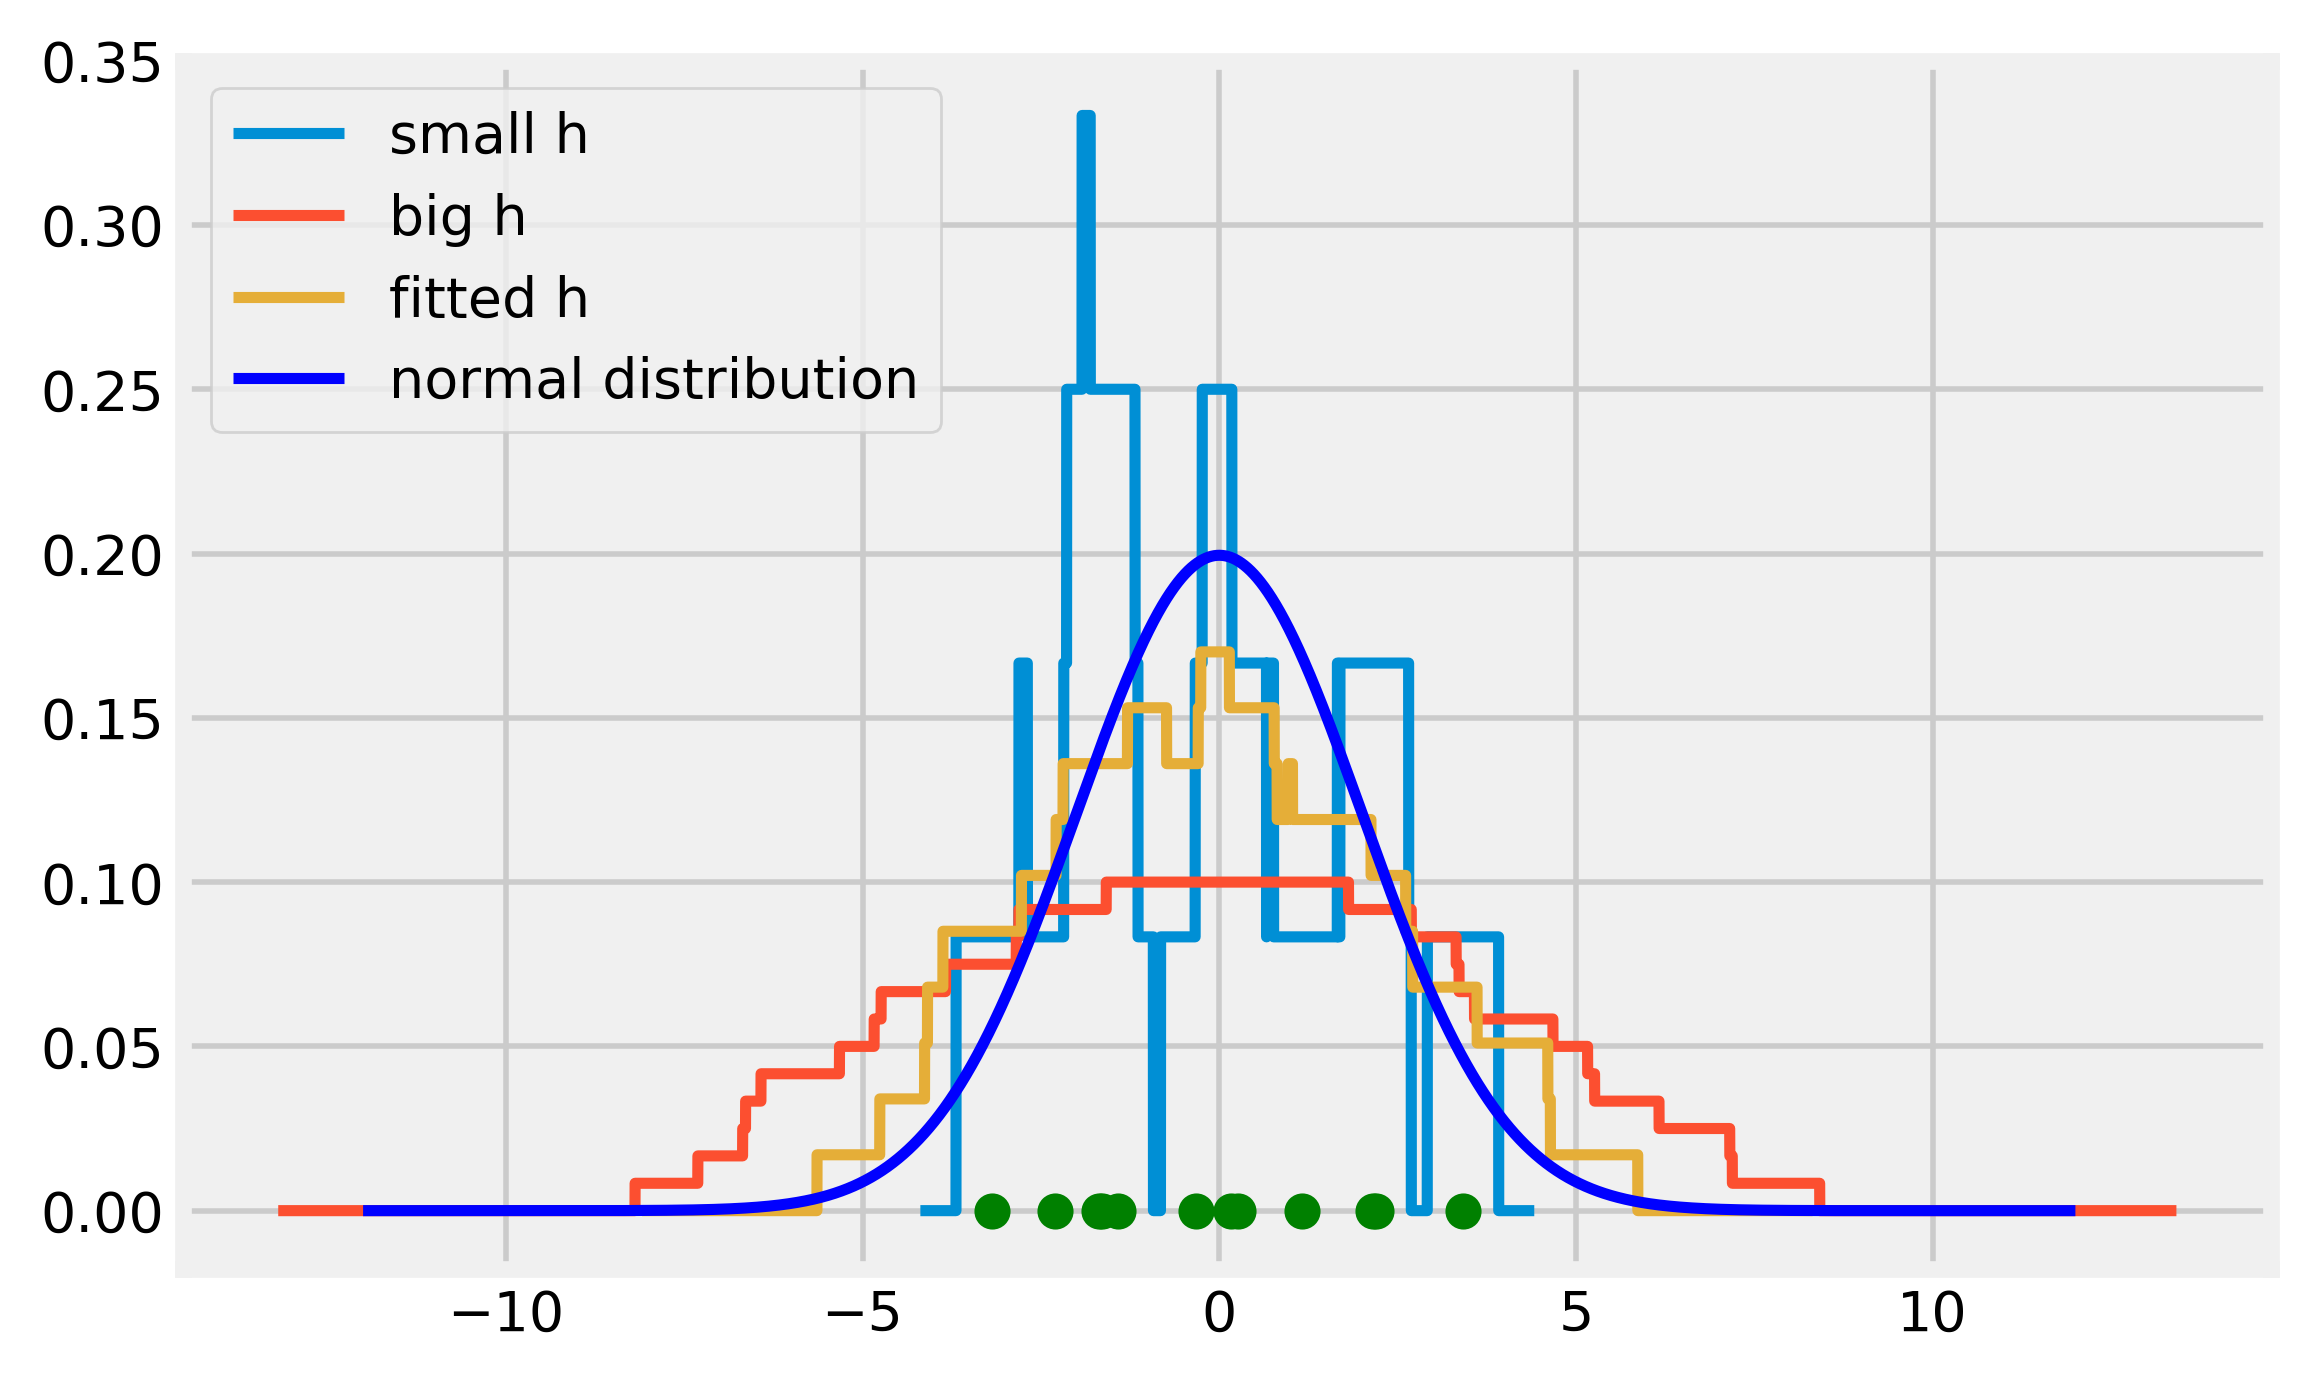

In [45]:
dat1
datmin = dat1.min()
datmax = dat1.max() # definitely care about this

h1=0.5 # small
h2=5 # too big
h3=2.45 # right value
f1 = putaboxonit(dat1, h1,"small h")
f2 = putaboxonit(dat1, h2,"big h")
f3 = putaboxonit(dat1, h3,"fitted h")

xvec = np.arange(-12, 12, .001)
plt.plot(xvec, stats.norm.pdf(xvec, 0, 2), c='blue',label ="normal distribution",lw=2)
plt.scatter(dat1, 0*dat1, c='green')
plt.legend (loc='upper left')
plt.rcParams['figure.dpi'] = 400

array([ 7.9542114 ,  0.16534025,  4.89439562,  1.58043708,  1.52955038,
        0.36139904,  5.40989522,  0.37413359,  2.46542151, 12.02458852,
        1.96090117,  0.75047551])

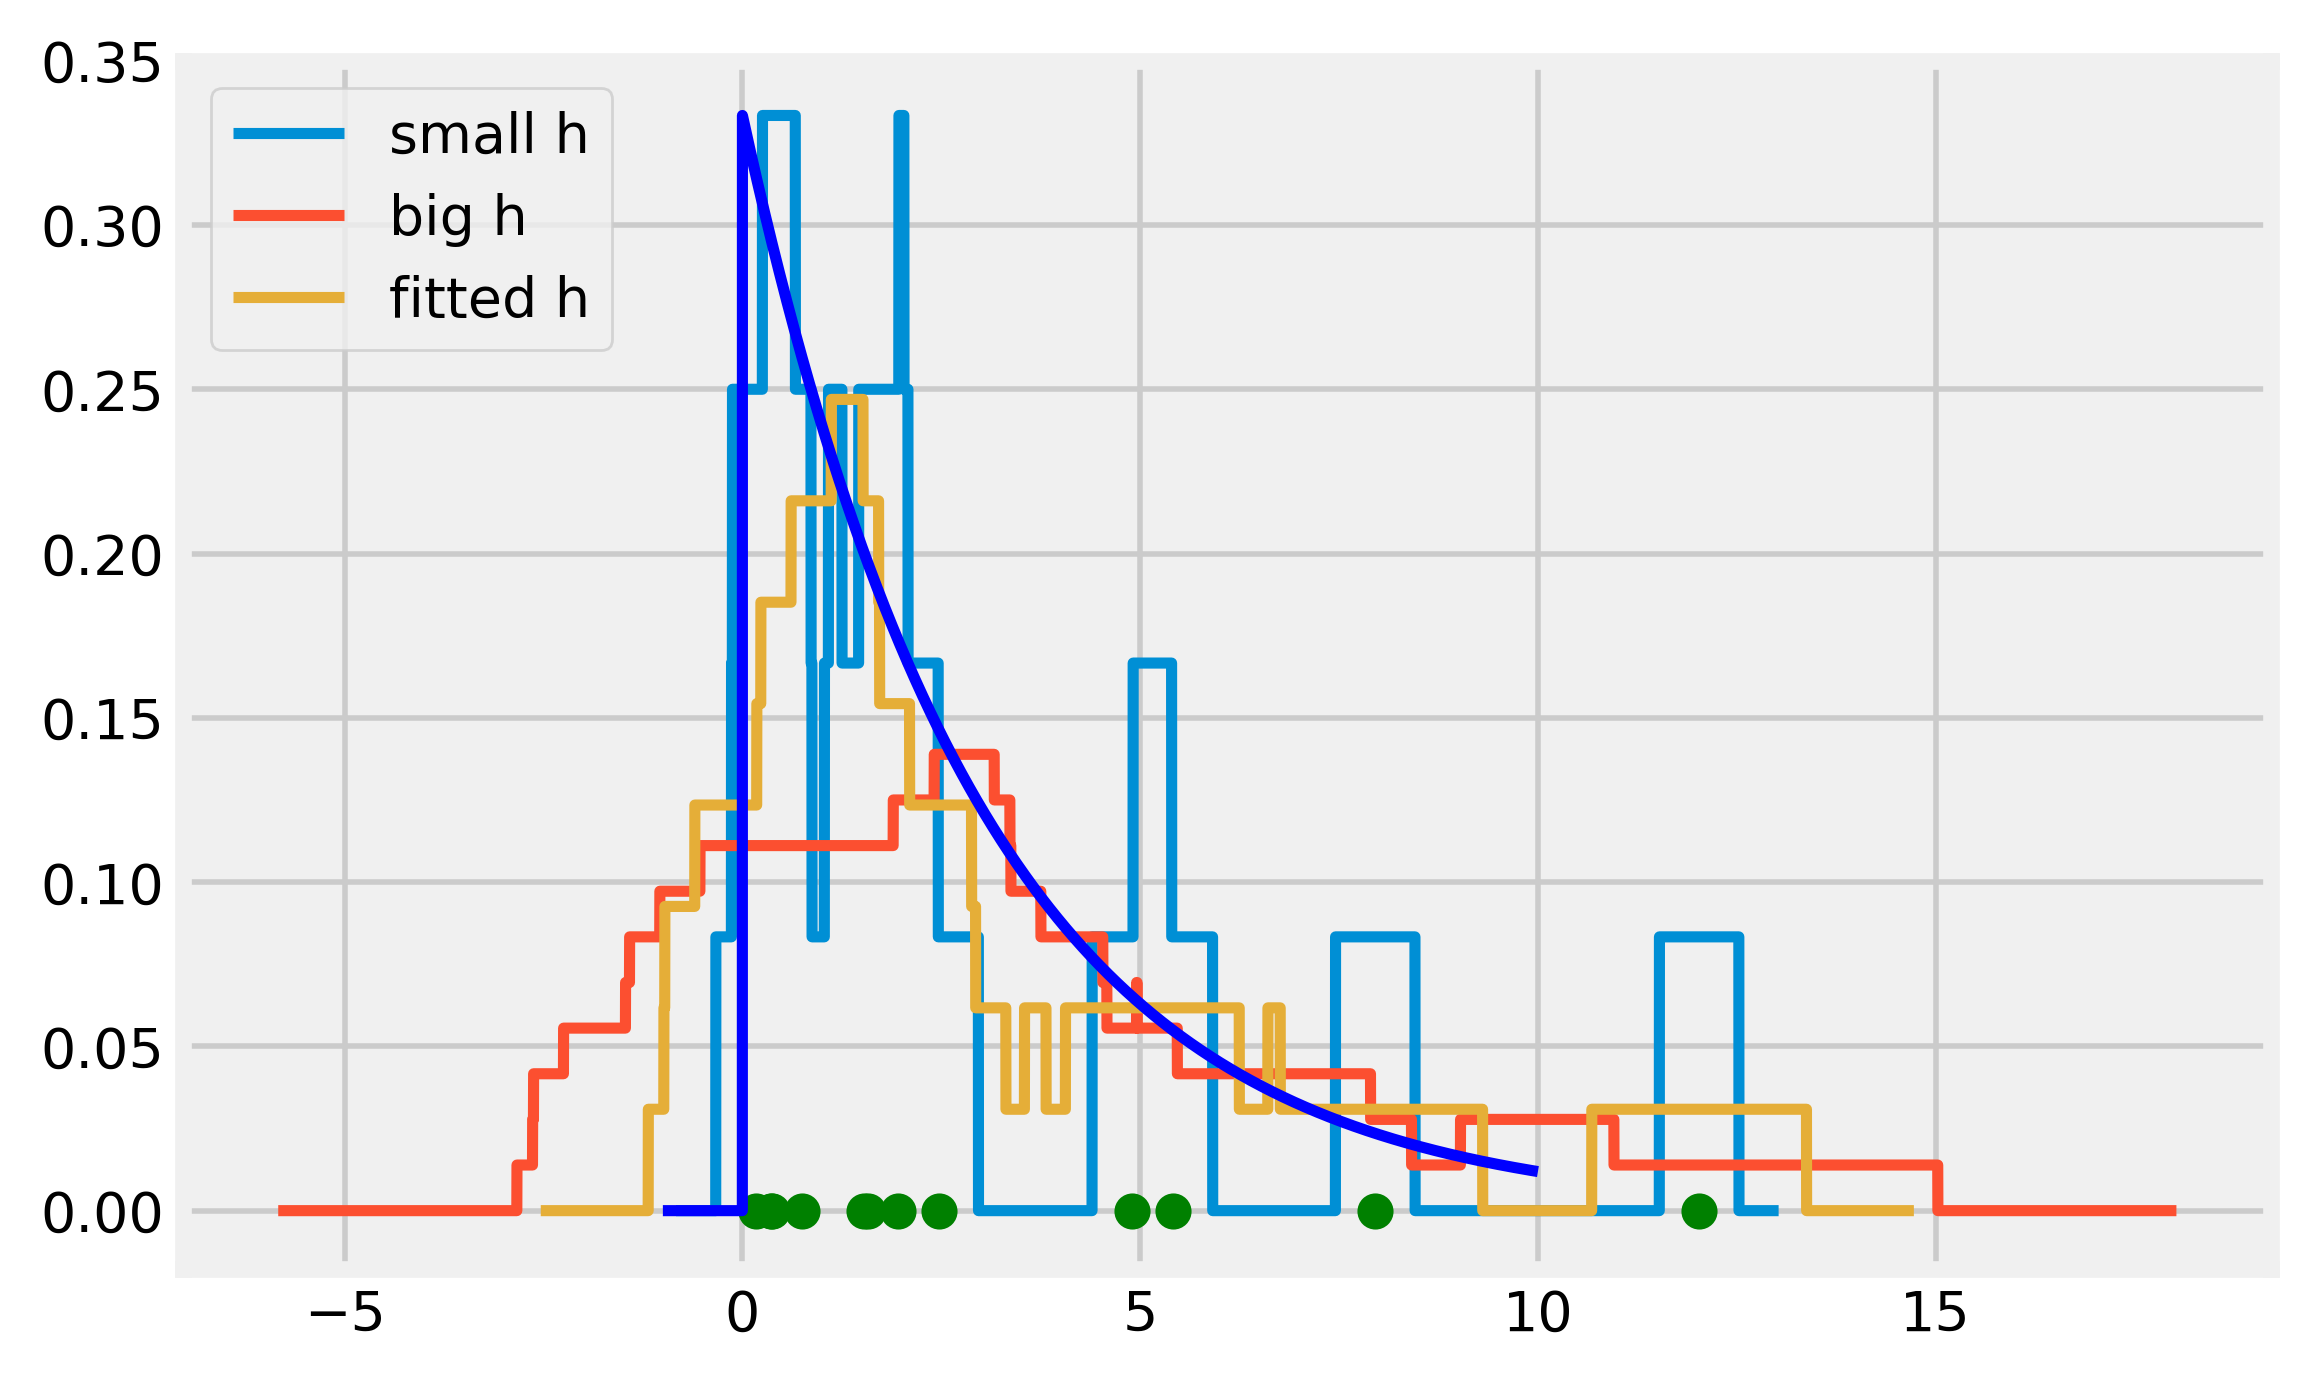

In [46]:
dat2
datmin = dat2.min()
datmax = dat2.max() # definitely care about this

h1=0.5 # small
h2=3# too big
h3=1.35 # ???
f1 = putaboxonit(dat2, h1,"small h")
f2 = putaboxonit(dat2, h2,"big h")
f3 = putaboxonit(dat2, h3,"fitted h")

xvec = np.arange(-1, 10, .001)
plt.plot(xvec, stats.expon.pdf(xvec, 0, 3), c='blue',lw=2)
plt.legend (loc='upper left')
plt.scatter(dat2, 0*dat2, c='green')

array([1.44703352, 2.03164067, 2.34521927, 2.70651778, 2.83518974,
       2.12452195, 2.20347464, 2.03791375, 1.15747373, 2.66338369,
       2.07463776, 2.60338062])

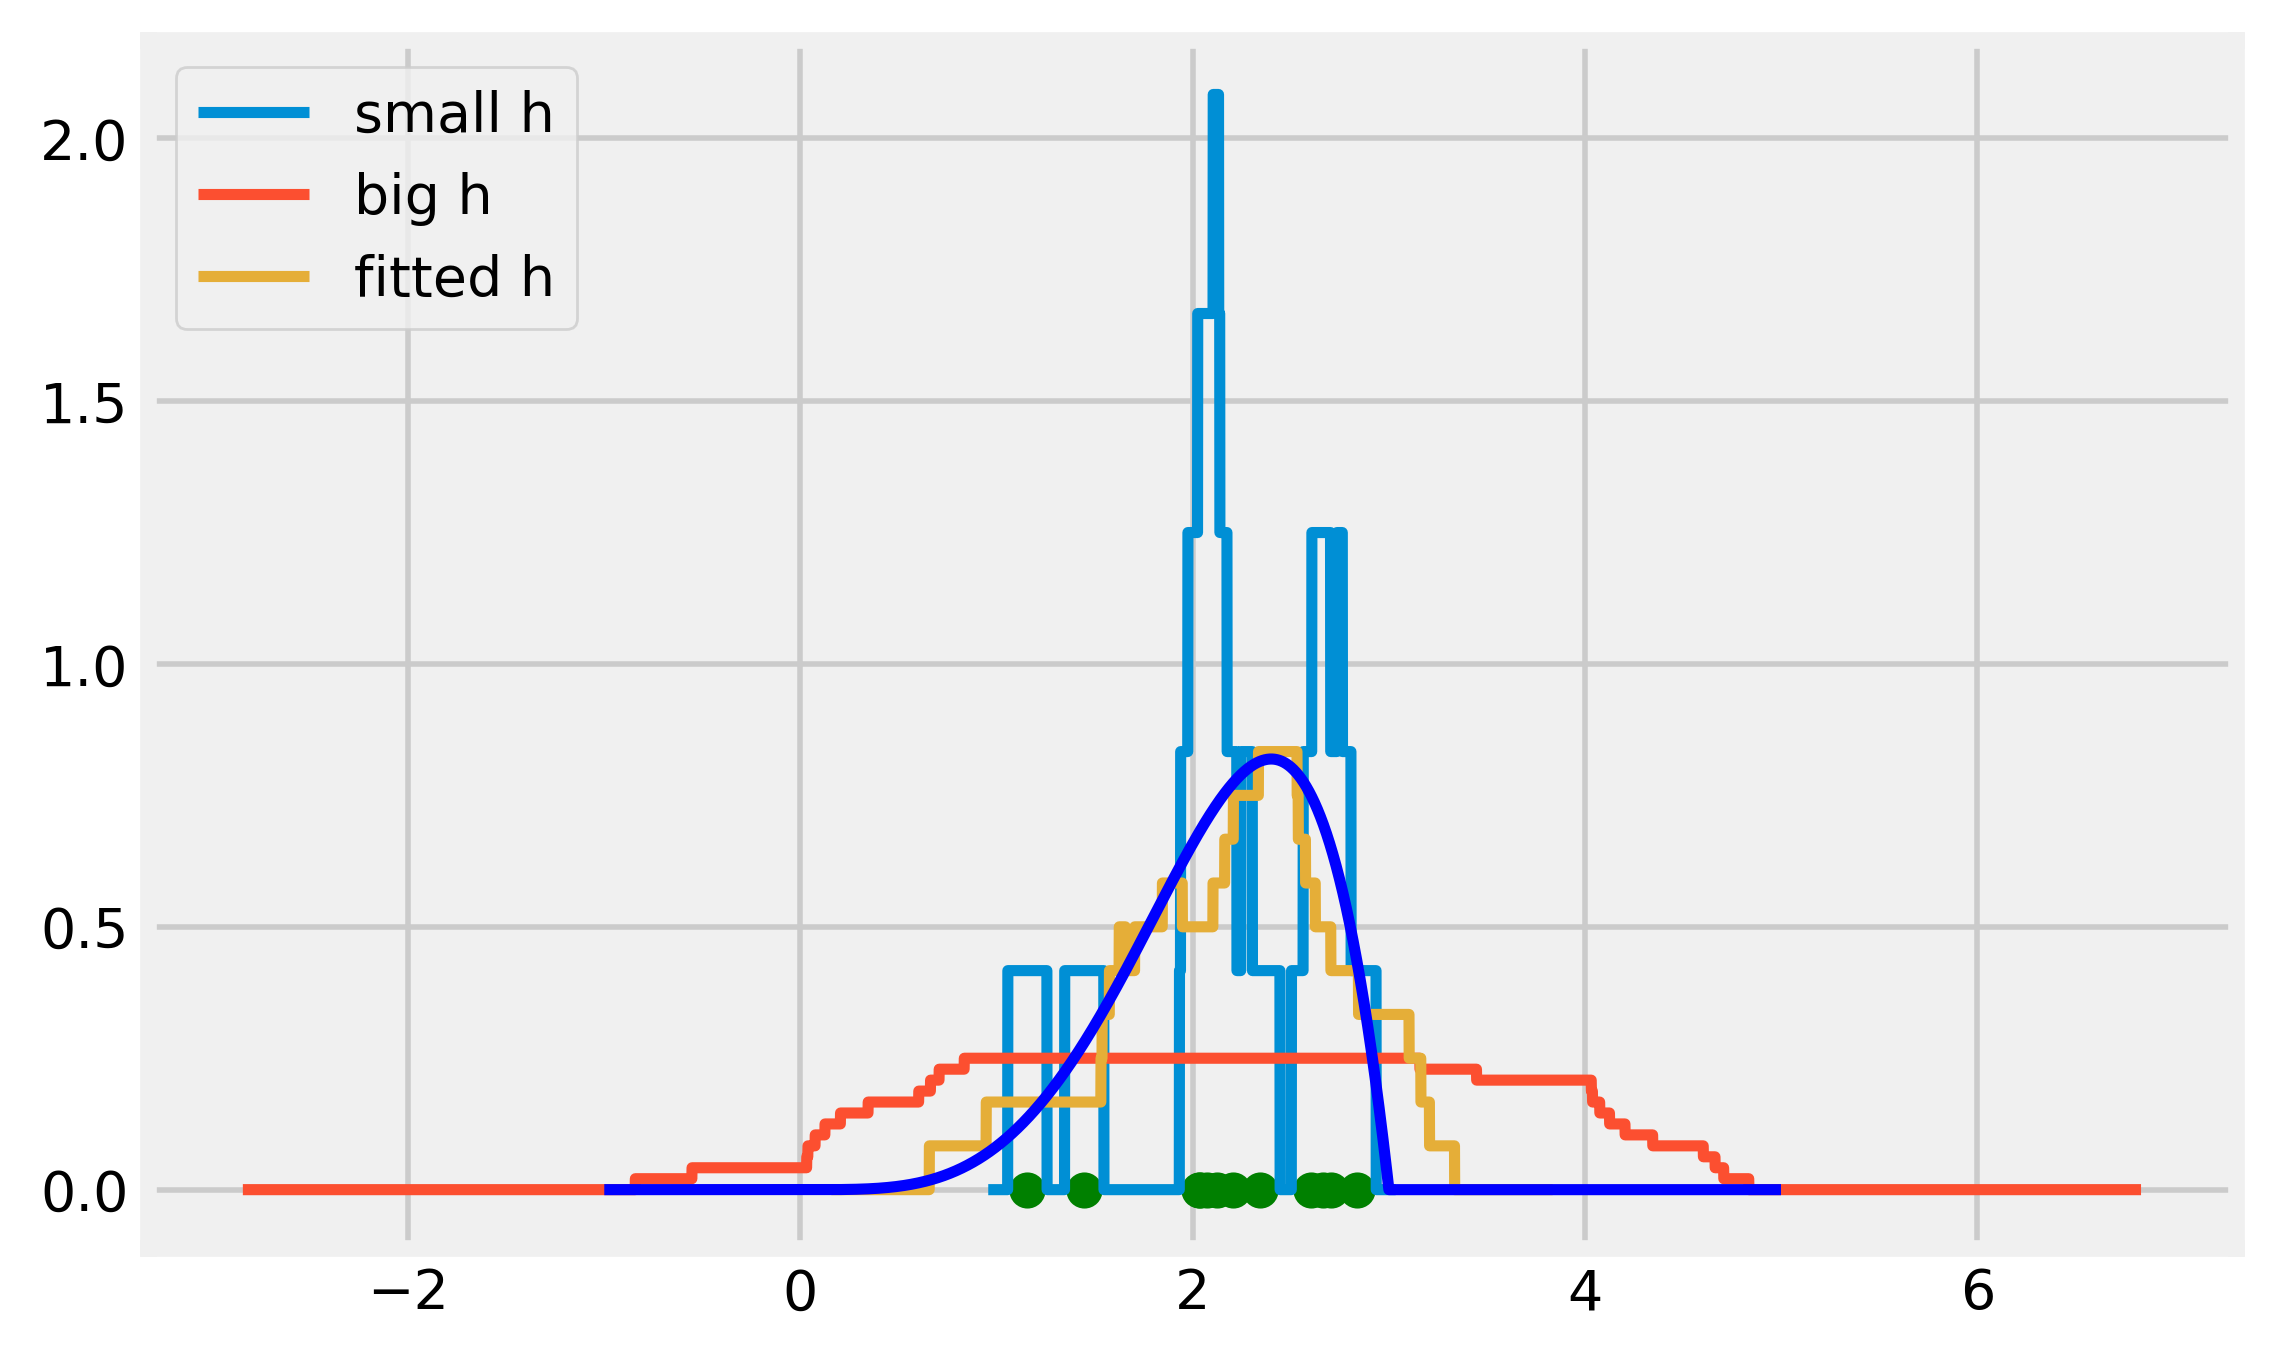

In [47]:
dat3
datmin = dat3.min()
datmax = dat3.max() # definitely care about this

h1=0.1 # small
h2=2 # big
h3=0.5 # right value

f1 = putaboxonit(dat3, h1,"small h")
f2 = putaboxonit(dat3, h2,"big h")
f3 = putaboxonit(dat3, h3,"fitted h")

xvec = np.arange(-1, 5, .001)
plt.plot(xvec, stats.beta.pdf(xvec,5,2, 0, 3), c='blue',lw=2)
plt.legend (loc='upper left')
plt.scatter(dat3, 0*dat3, c='green')

<font color=blue size=5>**Explanation:**</font>

- The graph of the normal distribution depends on two factors - the mean and the standard deviation. The mean of the distribution determines the location of the center of the graph, and the standard deviation determines the height and width of the graph.

- A low standard deviation indicates that the data points tend to be very close to the mean, whereas high standard deviation indicates that the data is spread out over a large range of values. In adddition, The total area under the normal curve is equal to 1. Therefore, the height of a graph has low standard deviation is high, and high standard deviation is short.


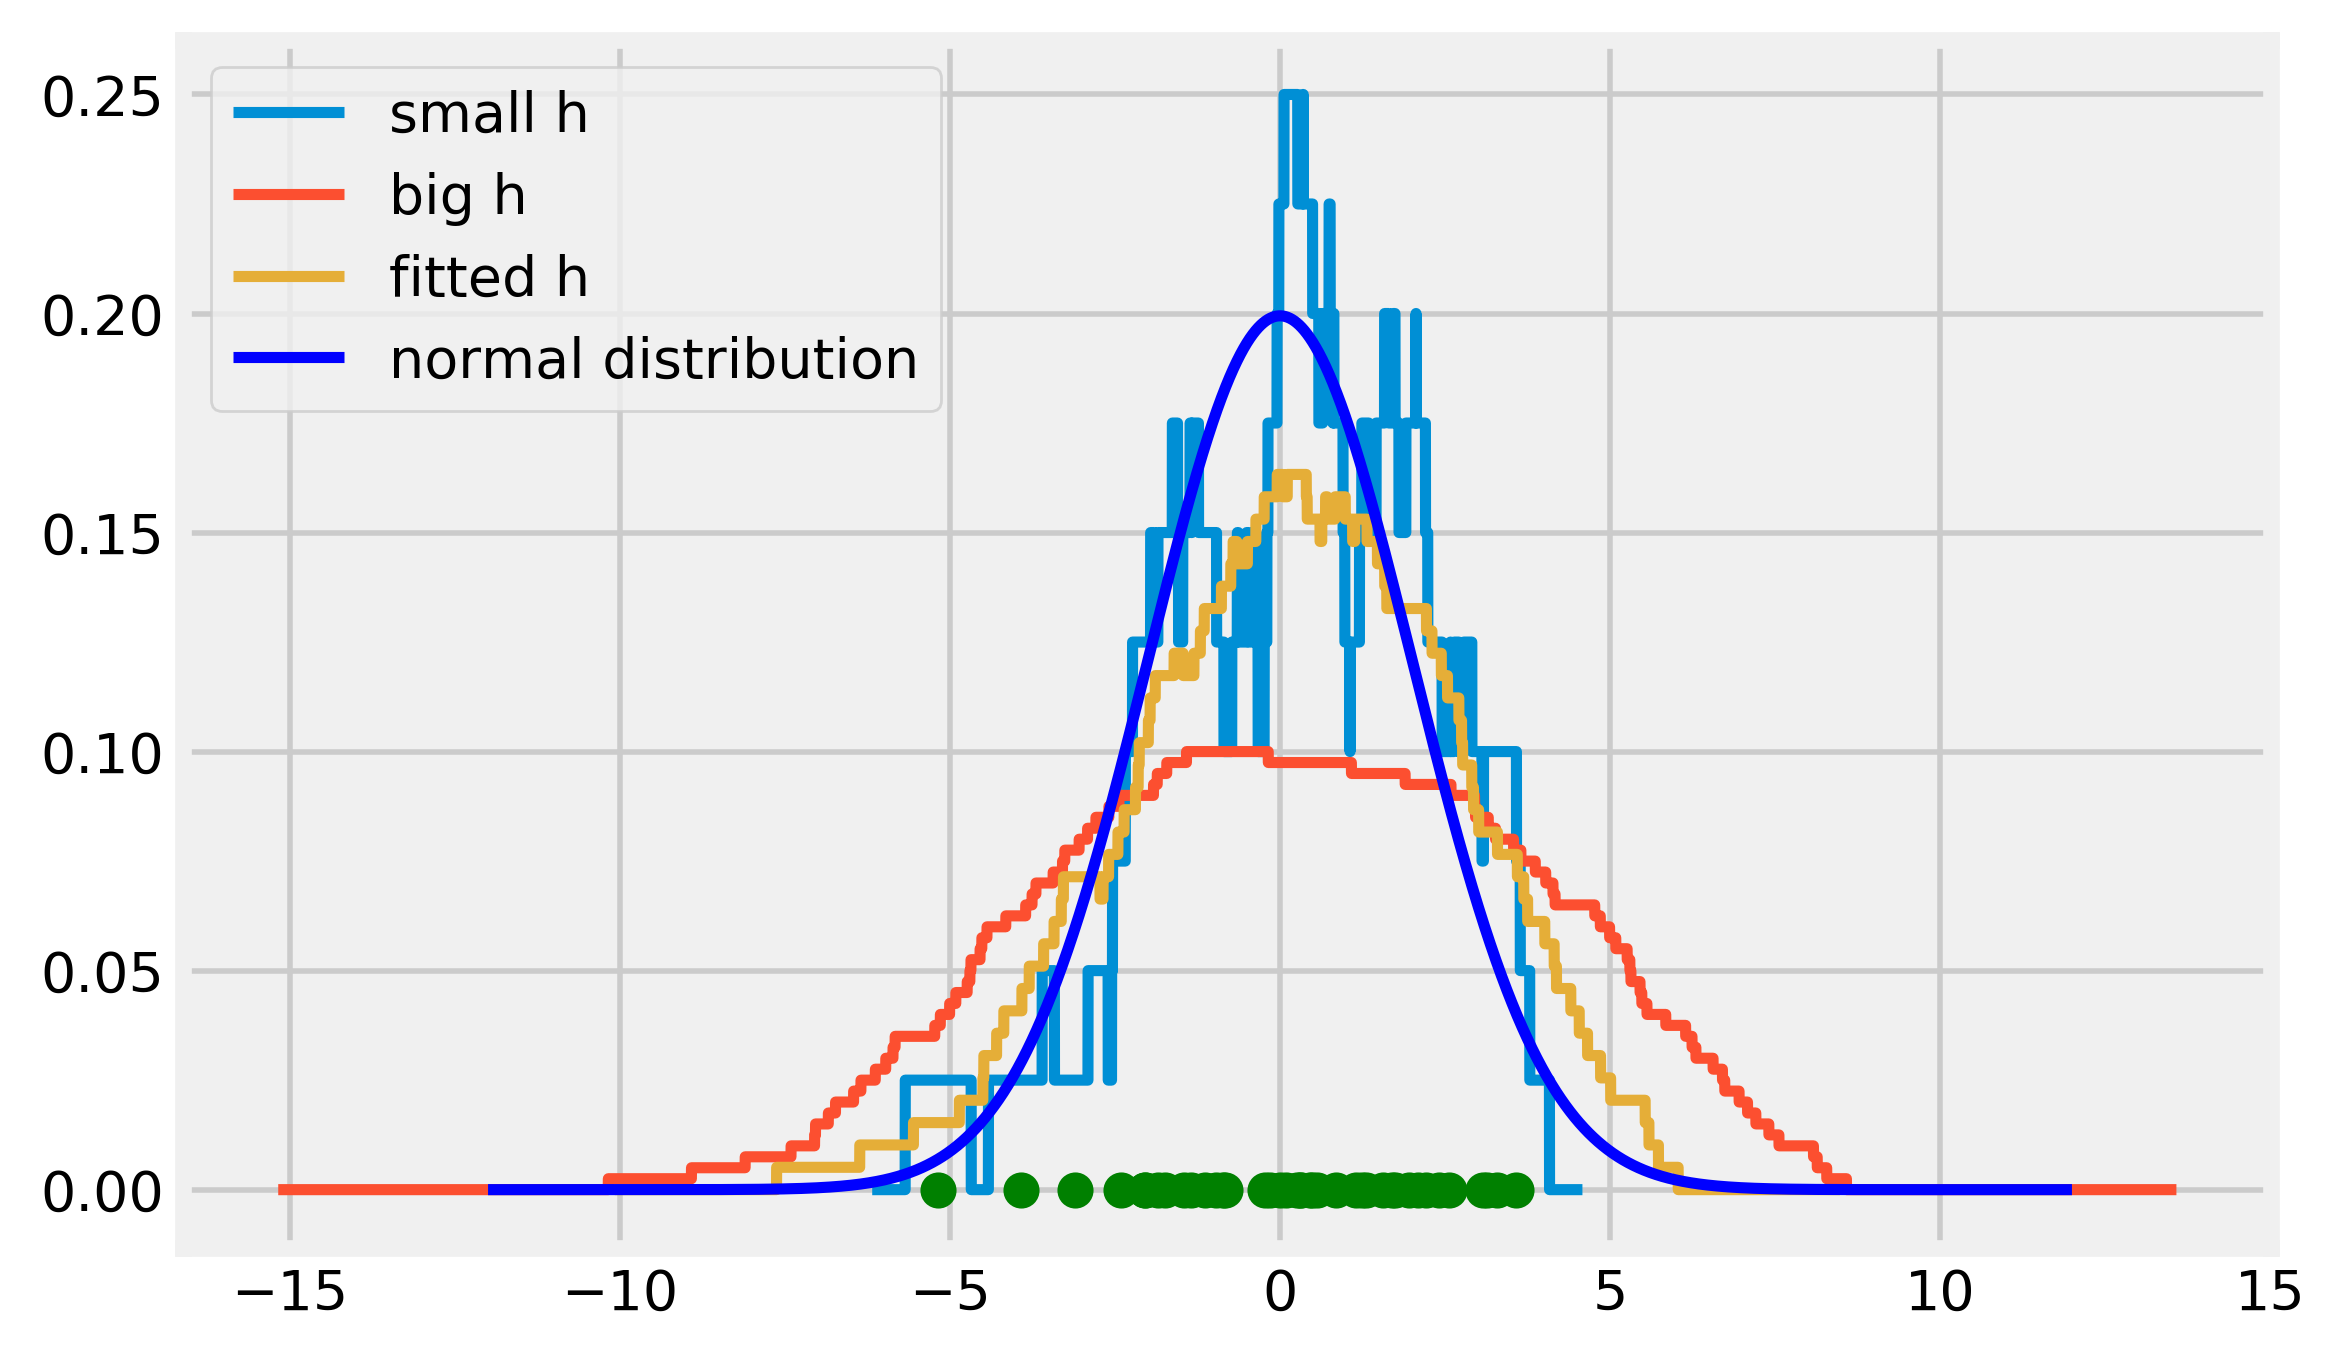

In [48]:
dat1=stats.norm.rvs(loc=0, scale=2, size=40)
datmin = dat1.min()
datmax = dat1.max() # definitely care about this

h1=0.5 # small
h2=5 # too big
h3=2.45 # right value
f1 = putaboxonit(dat1, h1,"small h")
f2 = putaboxonit(dat1, h2,"big h")
f3 = putaboxonit(dat1, h3,"fitted h")

xvec = np.arange(-12, 12, .001)
plt.plot(xvec, stats.norm.pdf(xvec, 0, 2), c='blue',label ="normal distribution",lw=2)
plt.scatter(dat1, 0*dat1, c='green')
plt.legend (loc='upper left')
plt.rcParams['figure.dpi'] = 400

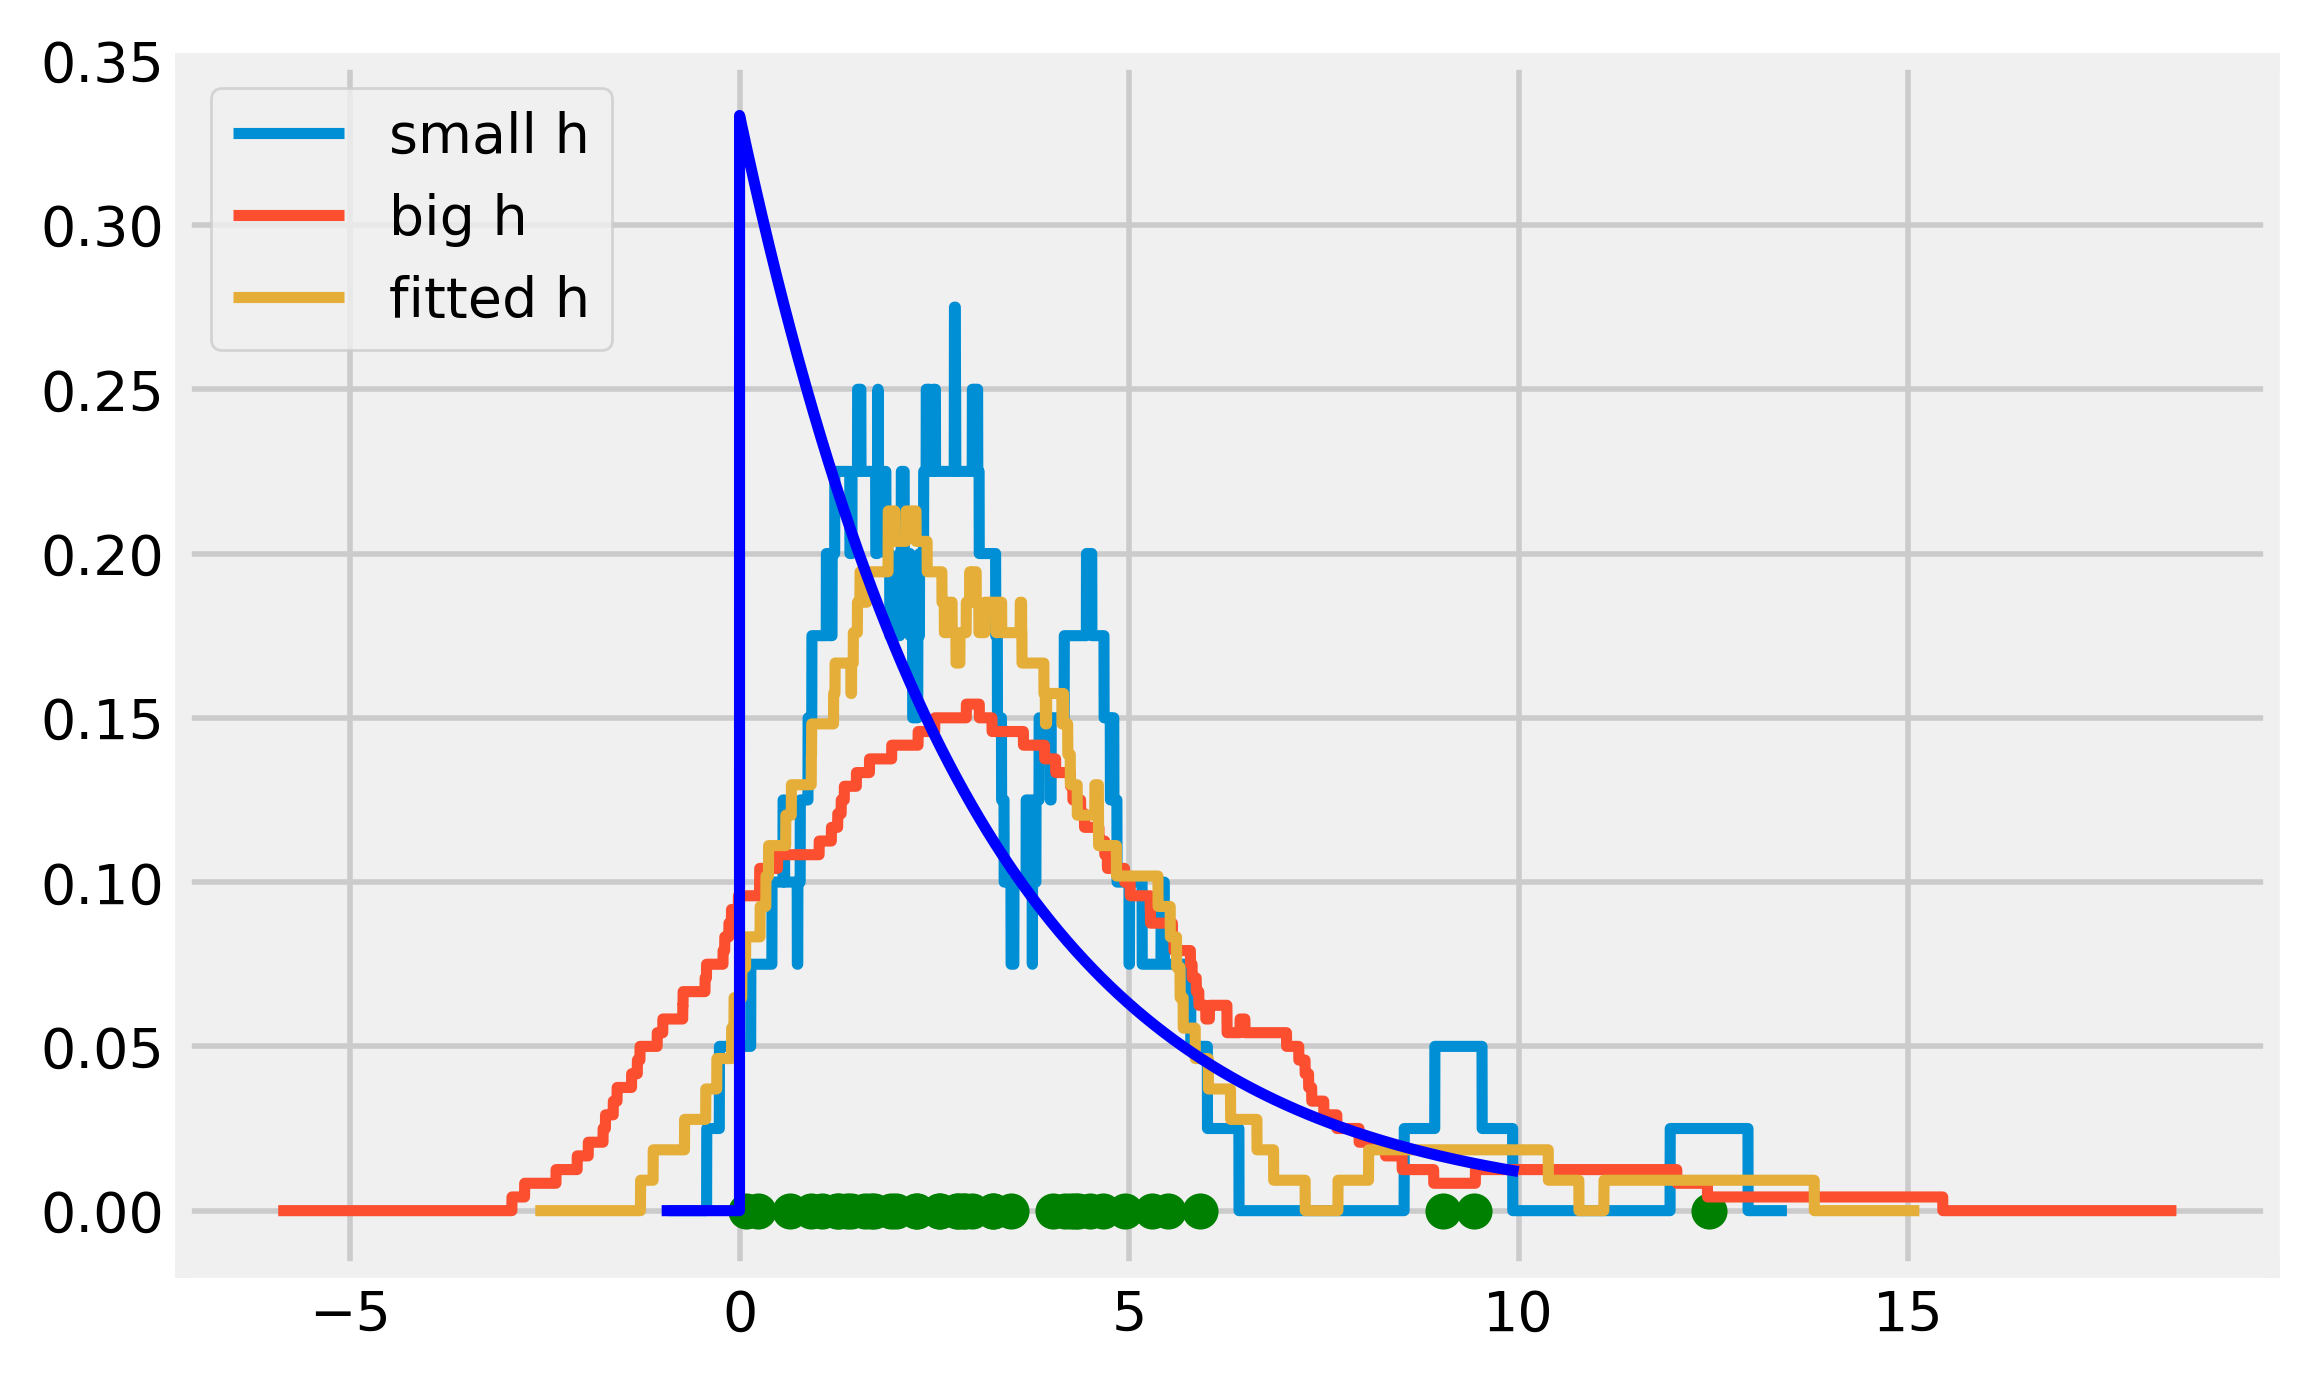

In [49]:
dat2=stats.expon.rvs(loc=0, scale=3, size=40)
datmin = dat2.min()
datmax = dat2.max() # definitely care about this

h1=0.5 # small
h2=3# too big
h3=1.35 # ???
f1 = putaboxonit(dat2, h1,"small h")
f2 = putaboxonit(dat2, h2,"big h")
f3 = putaboxonit(dat2, h3,"fitted h")

xvec = np.arange(-1, 10, .001)
plt.plot(xvec, stats.expon.pdf(xvec, 0, 3), c='blue',lw=2)
plt.legend (loc='upper left')
plt.scatter(dat2, 0*dat2, c='green')

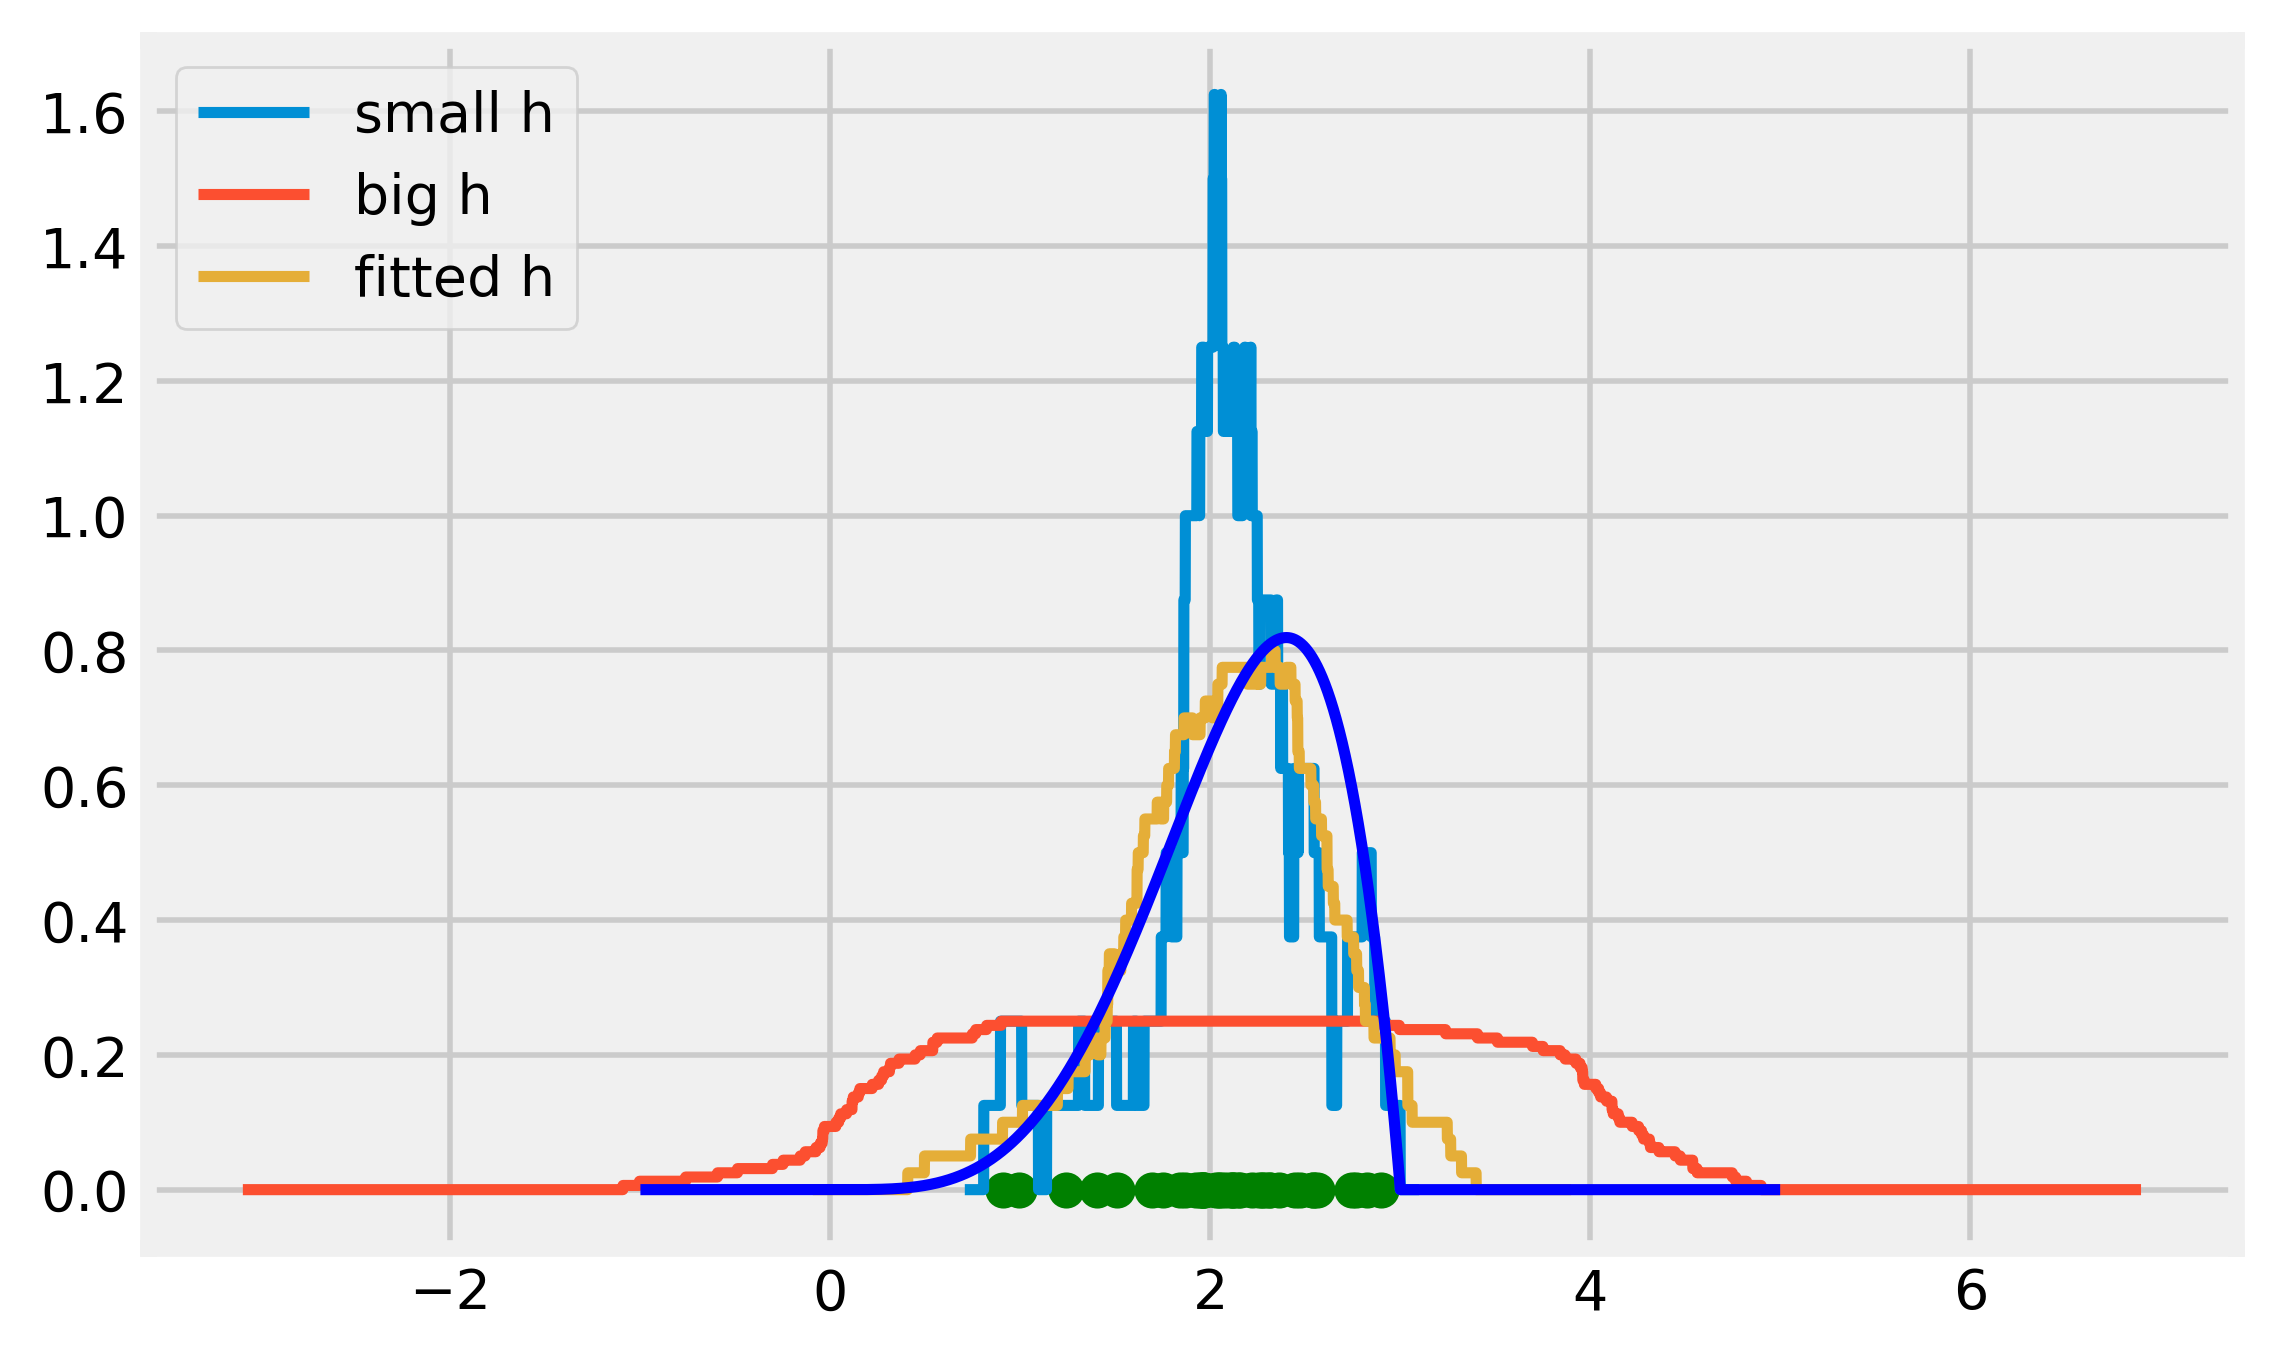

In [50]:
dat3=stats.beta.rvs(5,2,loc=0, scale=3, size=40)
datmin = dat3.min()
datmax = dat3.max() # definitely care about this

h1=0.1 # small
h2=2 # big
h3=0.5 # right value

f1 = putaboxonit(dat3, h1,"small h")
f2 = putaboxonit(dat3, h2,"big h")
f3 = putaboxonit(dat3, h3,"fitted h")

xvec = np.arange(-1, 5, .001)
plt.plot(xvec, stats.beta.pdf(xvec,5,2, 0, 3), c='blue',lw=2)
plt.legend (loc='upper left')
plt.scatter(dat3, 0*dat3, c='green')

In [51]:
def putabumponit(datvec, h,name):
    #xvec=np.arange(-0.2,1.2,0.01)
    xmin = datvec.min()
    xmax = datvec.max()
    nobs = len(datvec)
    xvec = np.arange(xmin - 2*h, xmax + 2*h, .001)
    
    yvec = np.zeros(len(xvec))
    for i in datvec:
        yvec += stats.beta.pdf(xvec,1.1,1.1,i-h,2*h)
    yvec = 1/nobs * yvec
    
    plt.plot(xvec, yvec,label=name,lw=2)
    return yvec, xvec

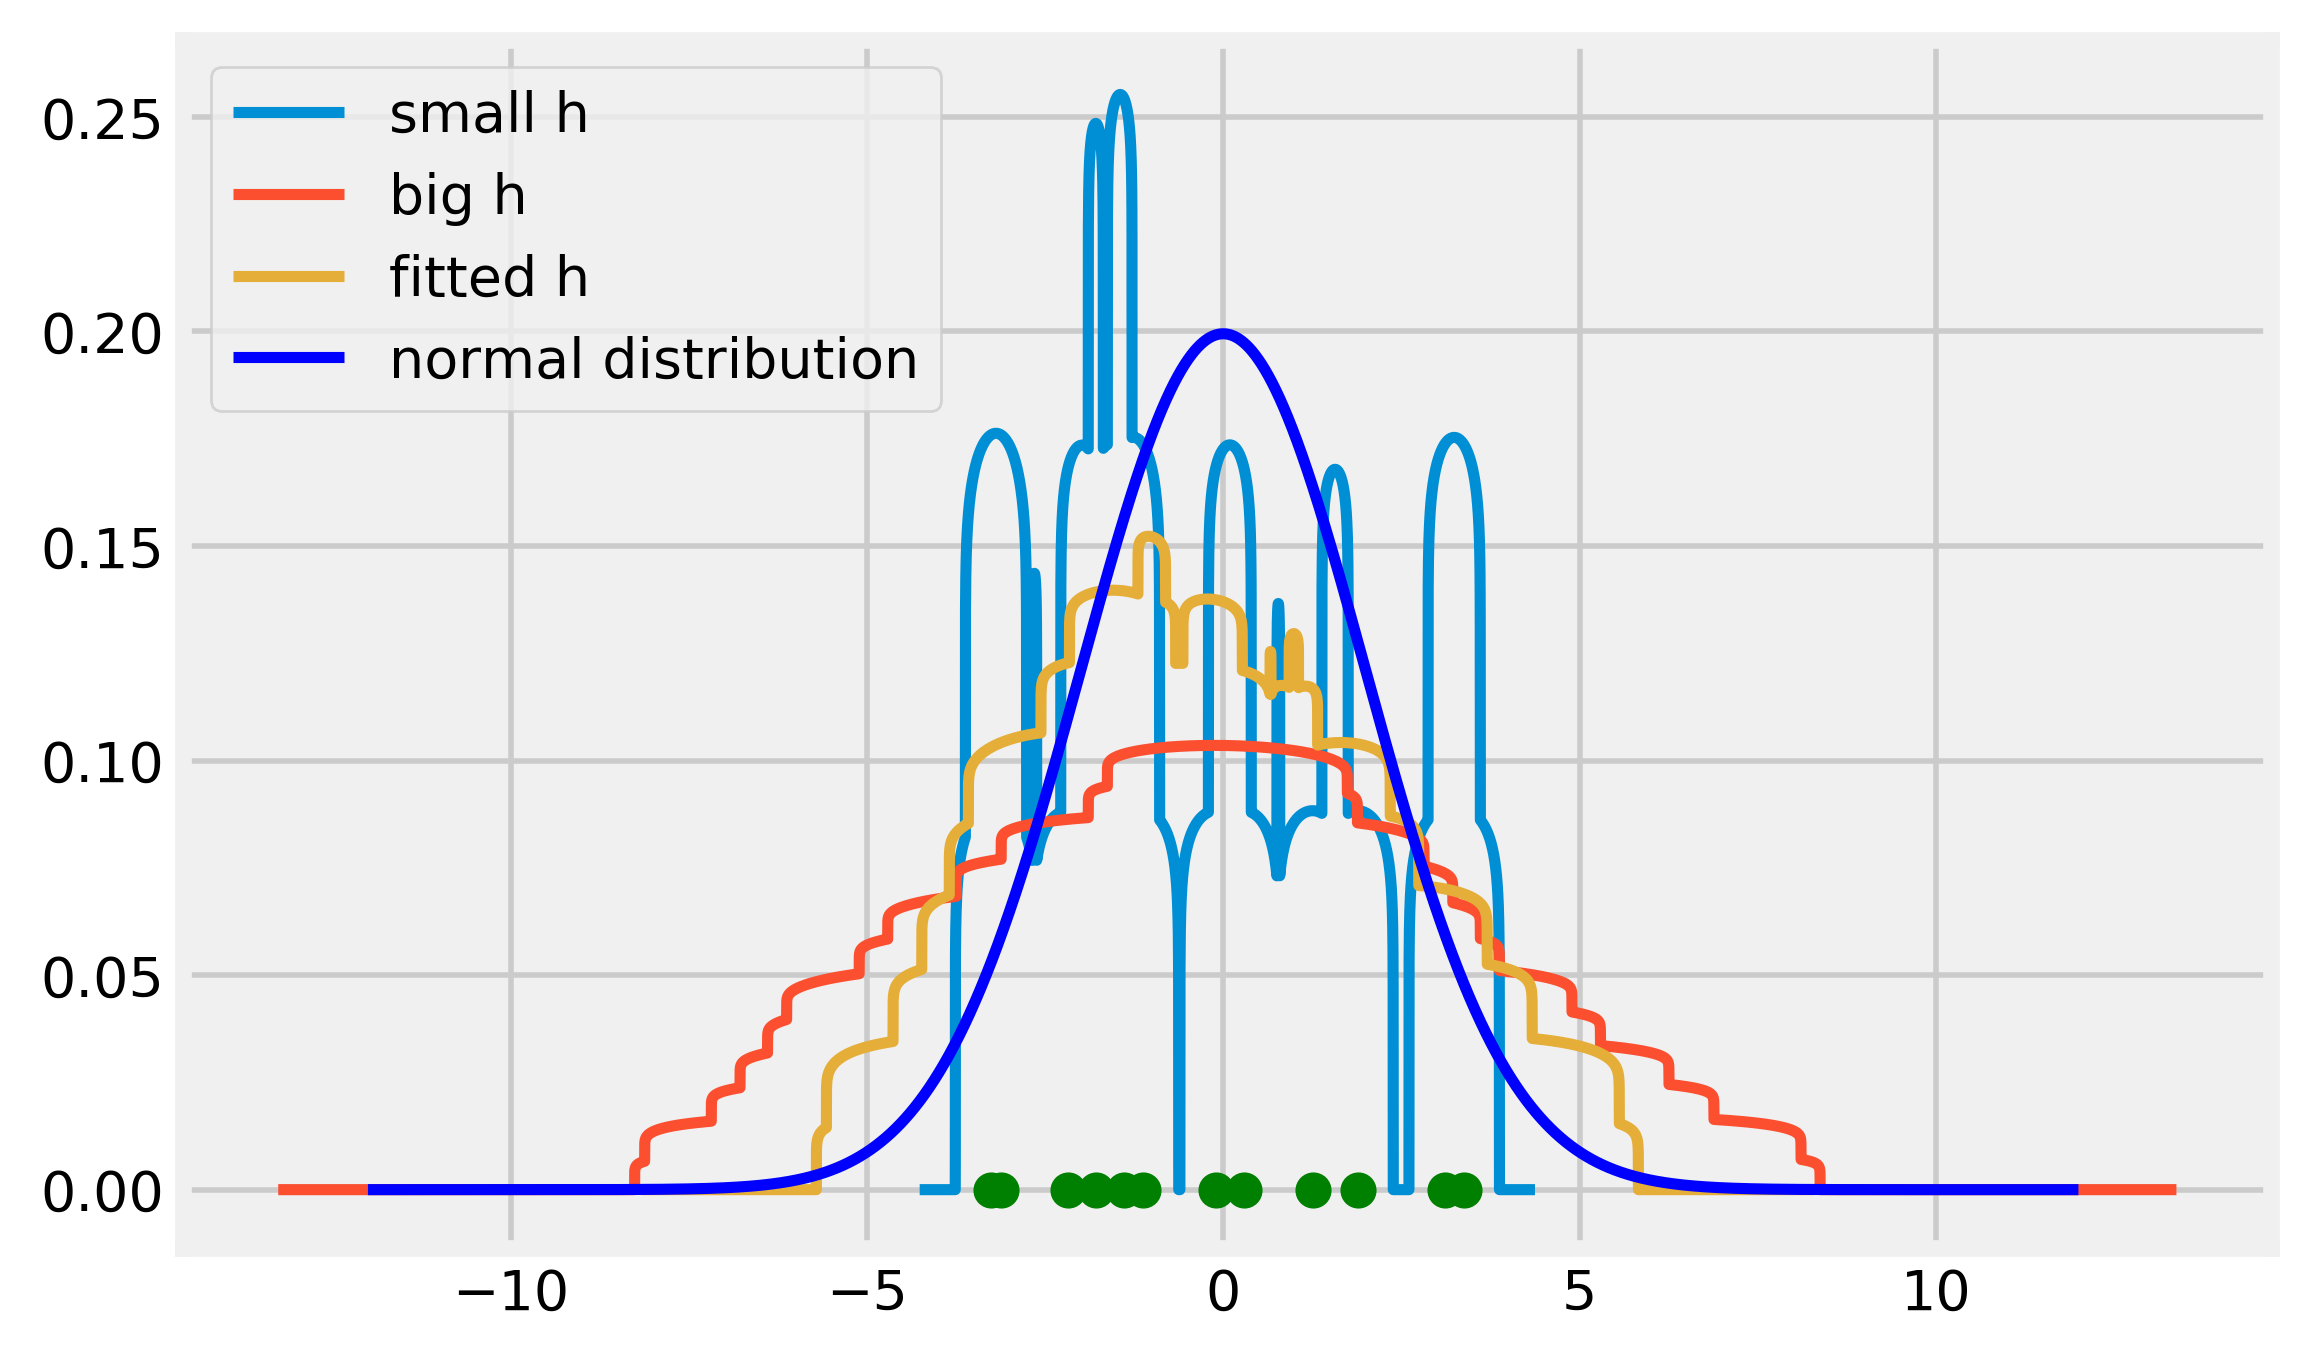

In [52]:
dat1=stats.norm.rvs(loc=0, scale=2, size=12)
datmin = 0 # who cares about the exact value of dat1.min()
datmax = dat1.max() # definitely care about this

h1=0.5 # small
h2=5 # too big
h3=2.45 # right value
f1 = putabumponit(dat1, h1,"small h")
f2 = putabumponit(dat1, h2,"big h")
f3 = putabumponit(dat1, h3,"fitted h")

xvec = np.arange(-12, 12, .001)
plt.plot(xvec, stats.norm.pdf(xvec, 0, 2), c='blue',label ="normal distribution",lw=2)
plt.scatter(dat1, 0*dat1, c='green')
plt.legend (loc='upper left')

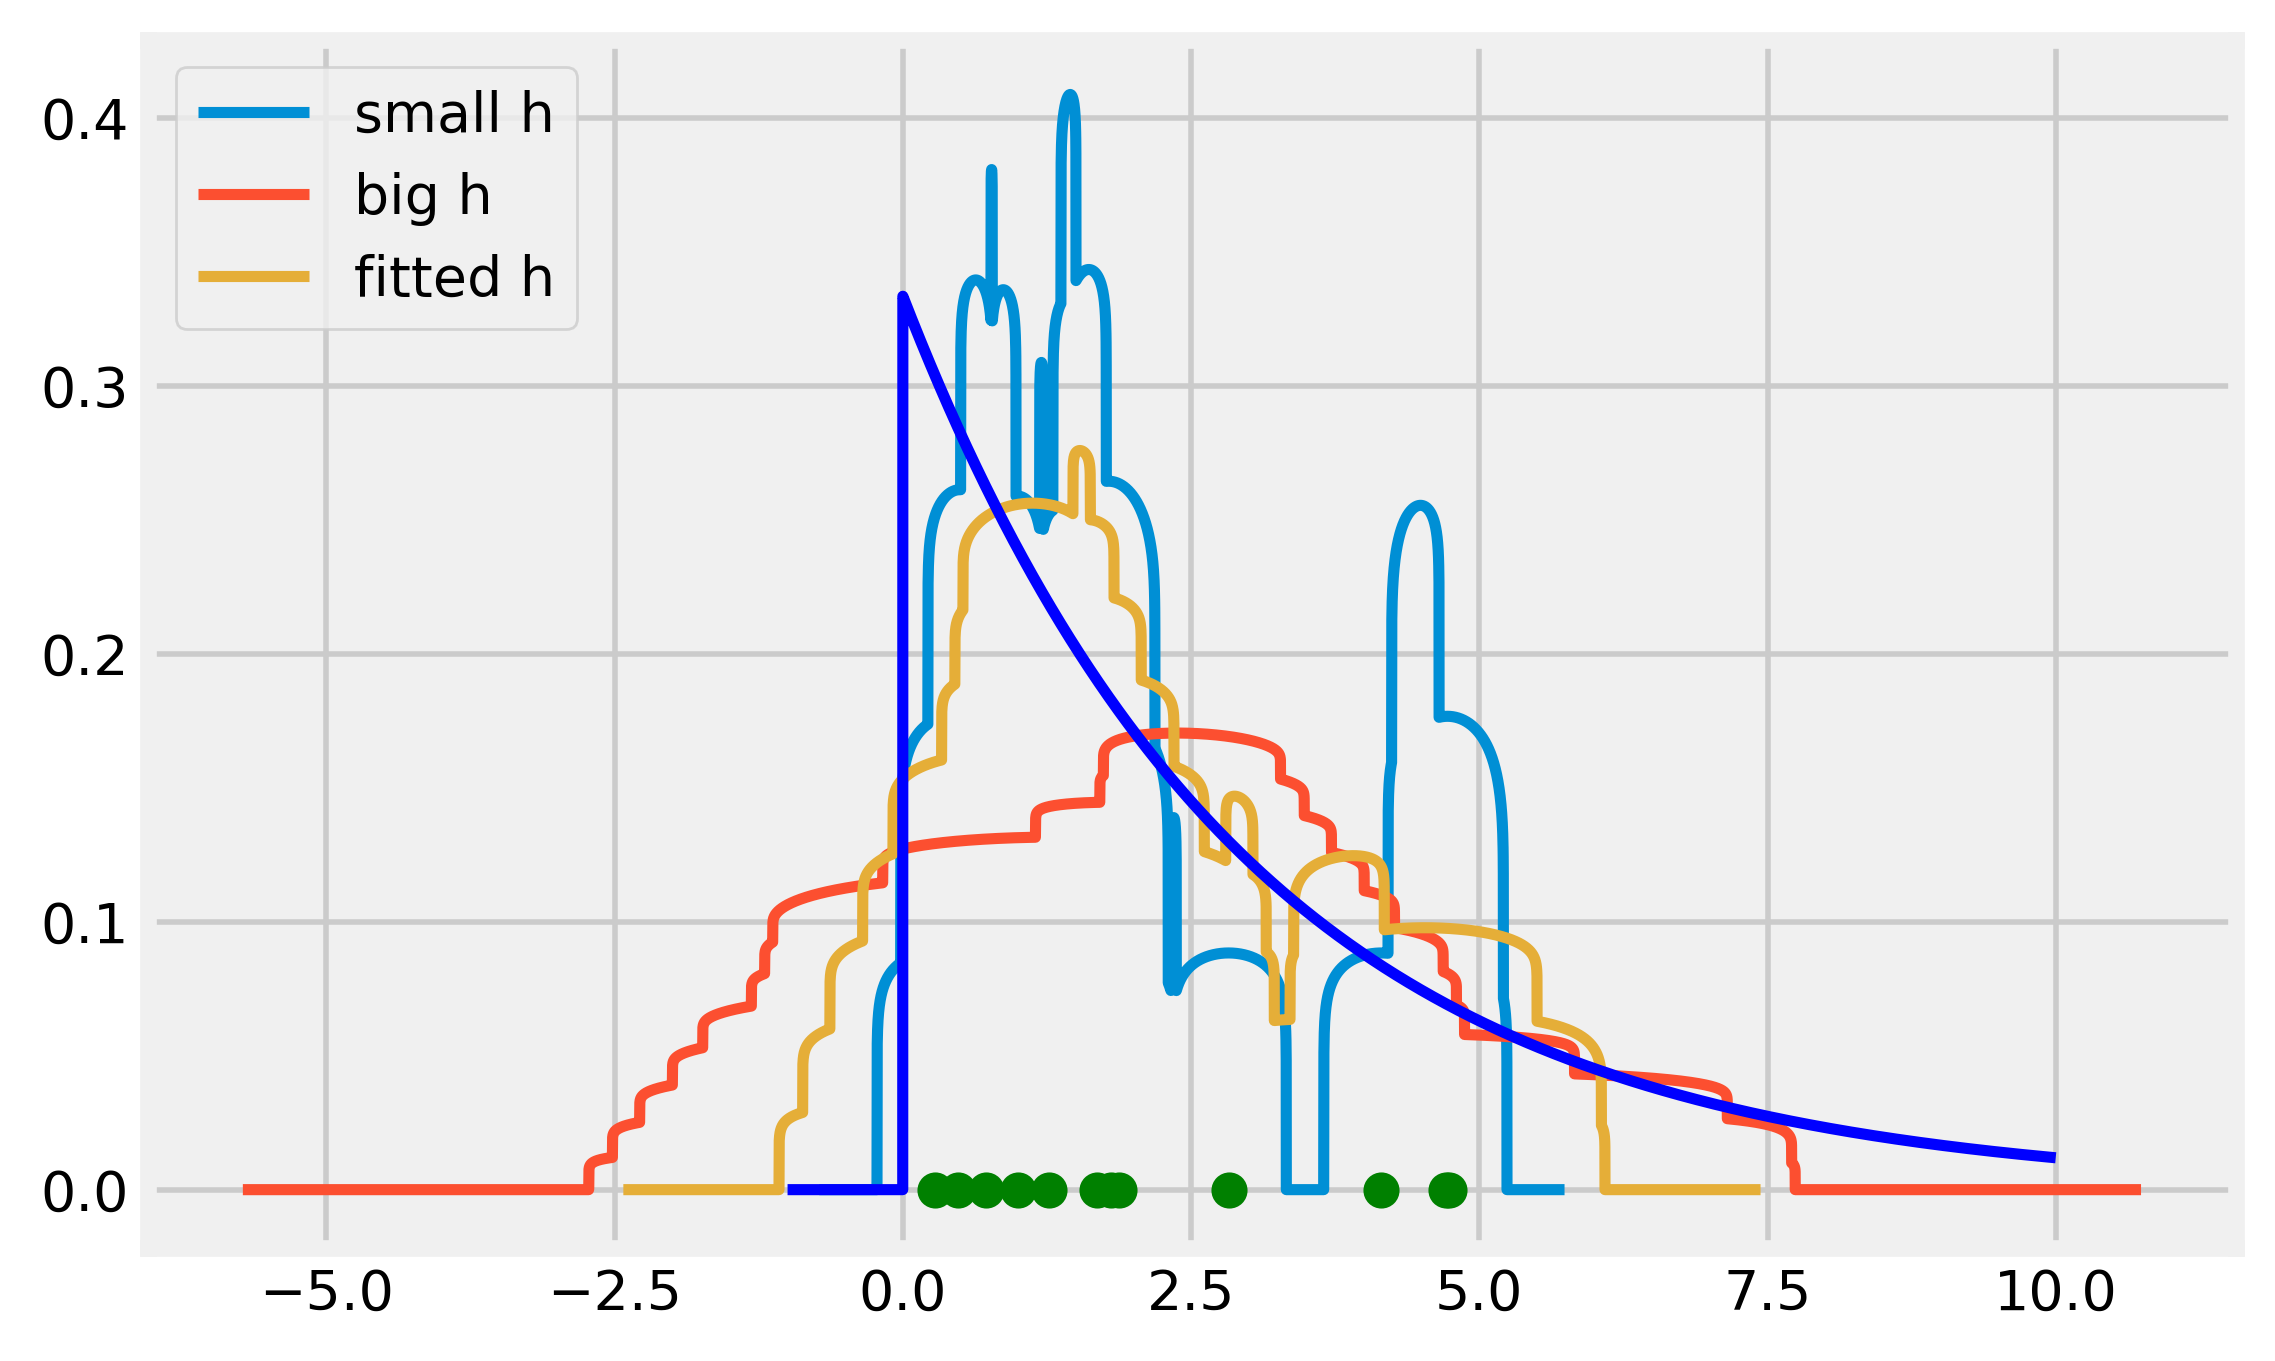

In [53]:
dat2=stats.expon.rvs(loc=0, scale=3, size=12)
datmin = dat2.min()
datmax = dat2.max() # definitely care about this

h1=0.5 # small
h2=3# too big
h3=1.35 # ???
f1 = putabumponit(dat2, h1,"small h")
f2 = putabumponit(dat2, h2,"big h")
f3 = putabumponit(dat2, h3,"fitted h")

xvec = np.arange(-1, 10, .001)
plt.plot(xvec, stats.expon.pdf(xvec, 0, 3), c='blue',lw=2)
plt.legend (loc='upper left')
plt.scatter(dat2, 0*dat2, c='green')

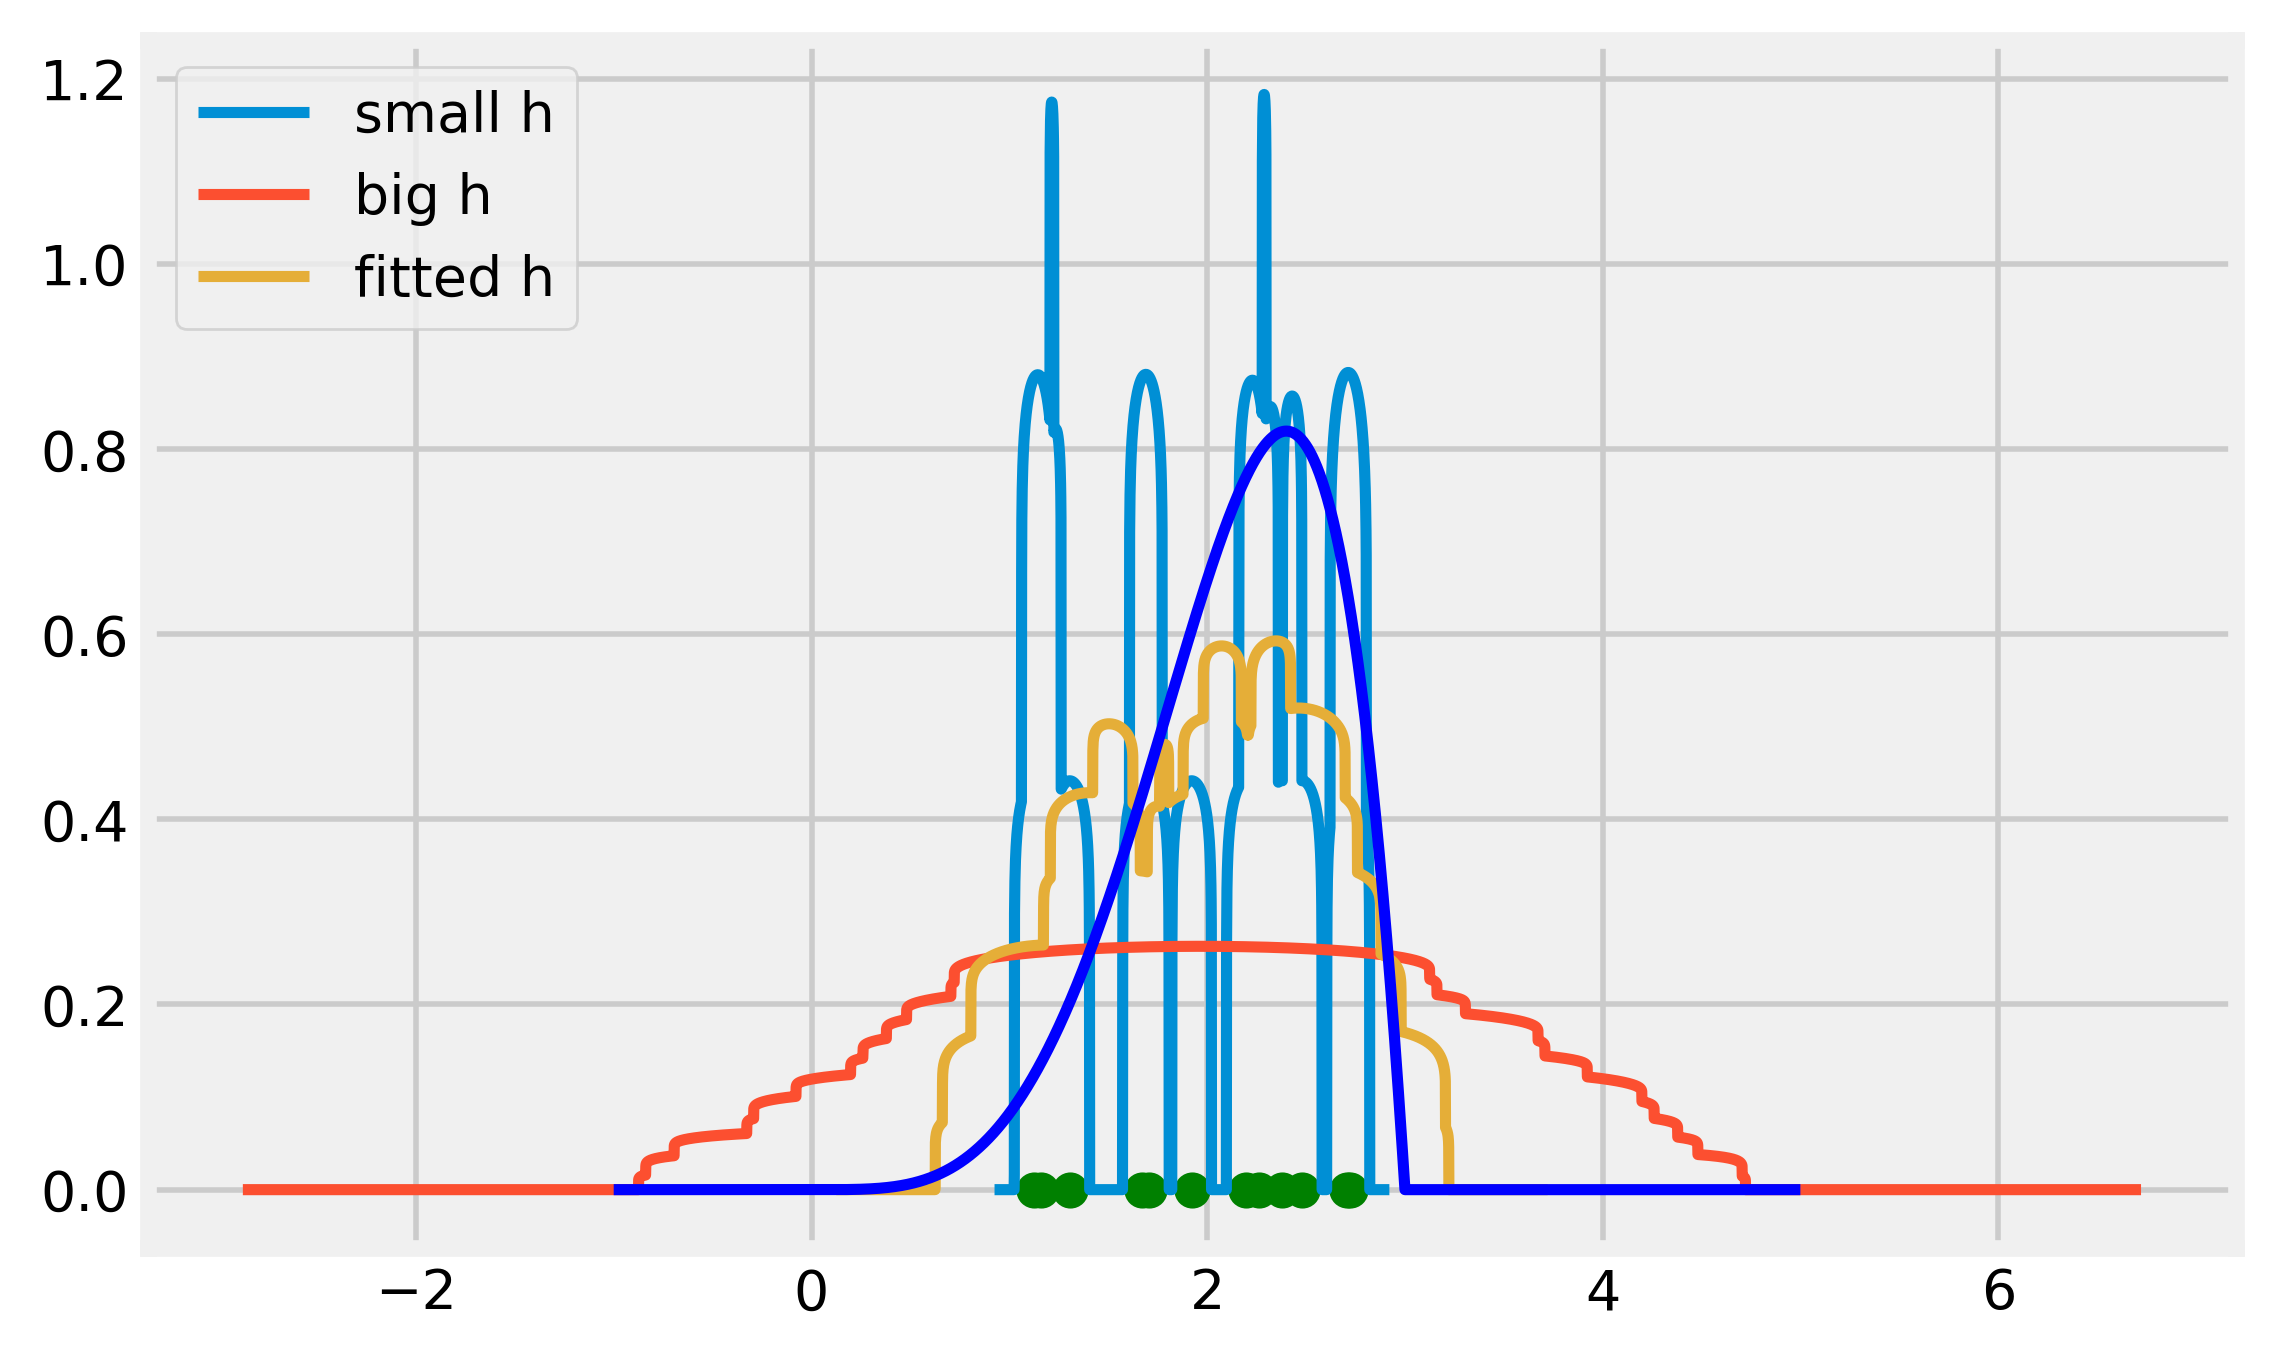

In [36]:
dat3=stats.beta.rvs(5,2,loc=0, scale=3, size=12)
datmin = dat3.min()
datmax = dat3.max() # definitely care about this

h1=0.1 # small
h2=2 # big
h3=0.5 # right value

f1 = putabumponit(dat3, h1,"small h")
f2 = putabumponit(dat3, h2,"big h")
f3 = putabumponit(dat3, h3,"fitted h")

xvec = np.arange(-1, 5, .001)
plt.plot(xvec, stats.beta.pdf(xvec,5,2, 0, 3), c='blue',lw=2)
plt.legend (loc='upper left')
plt.scatter(dat3, 0*dat3, c='green')

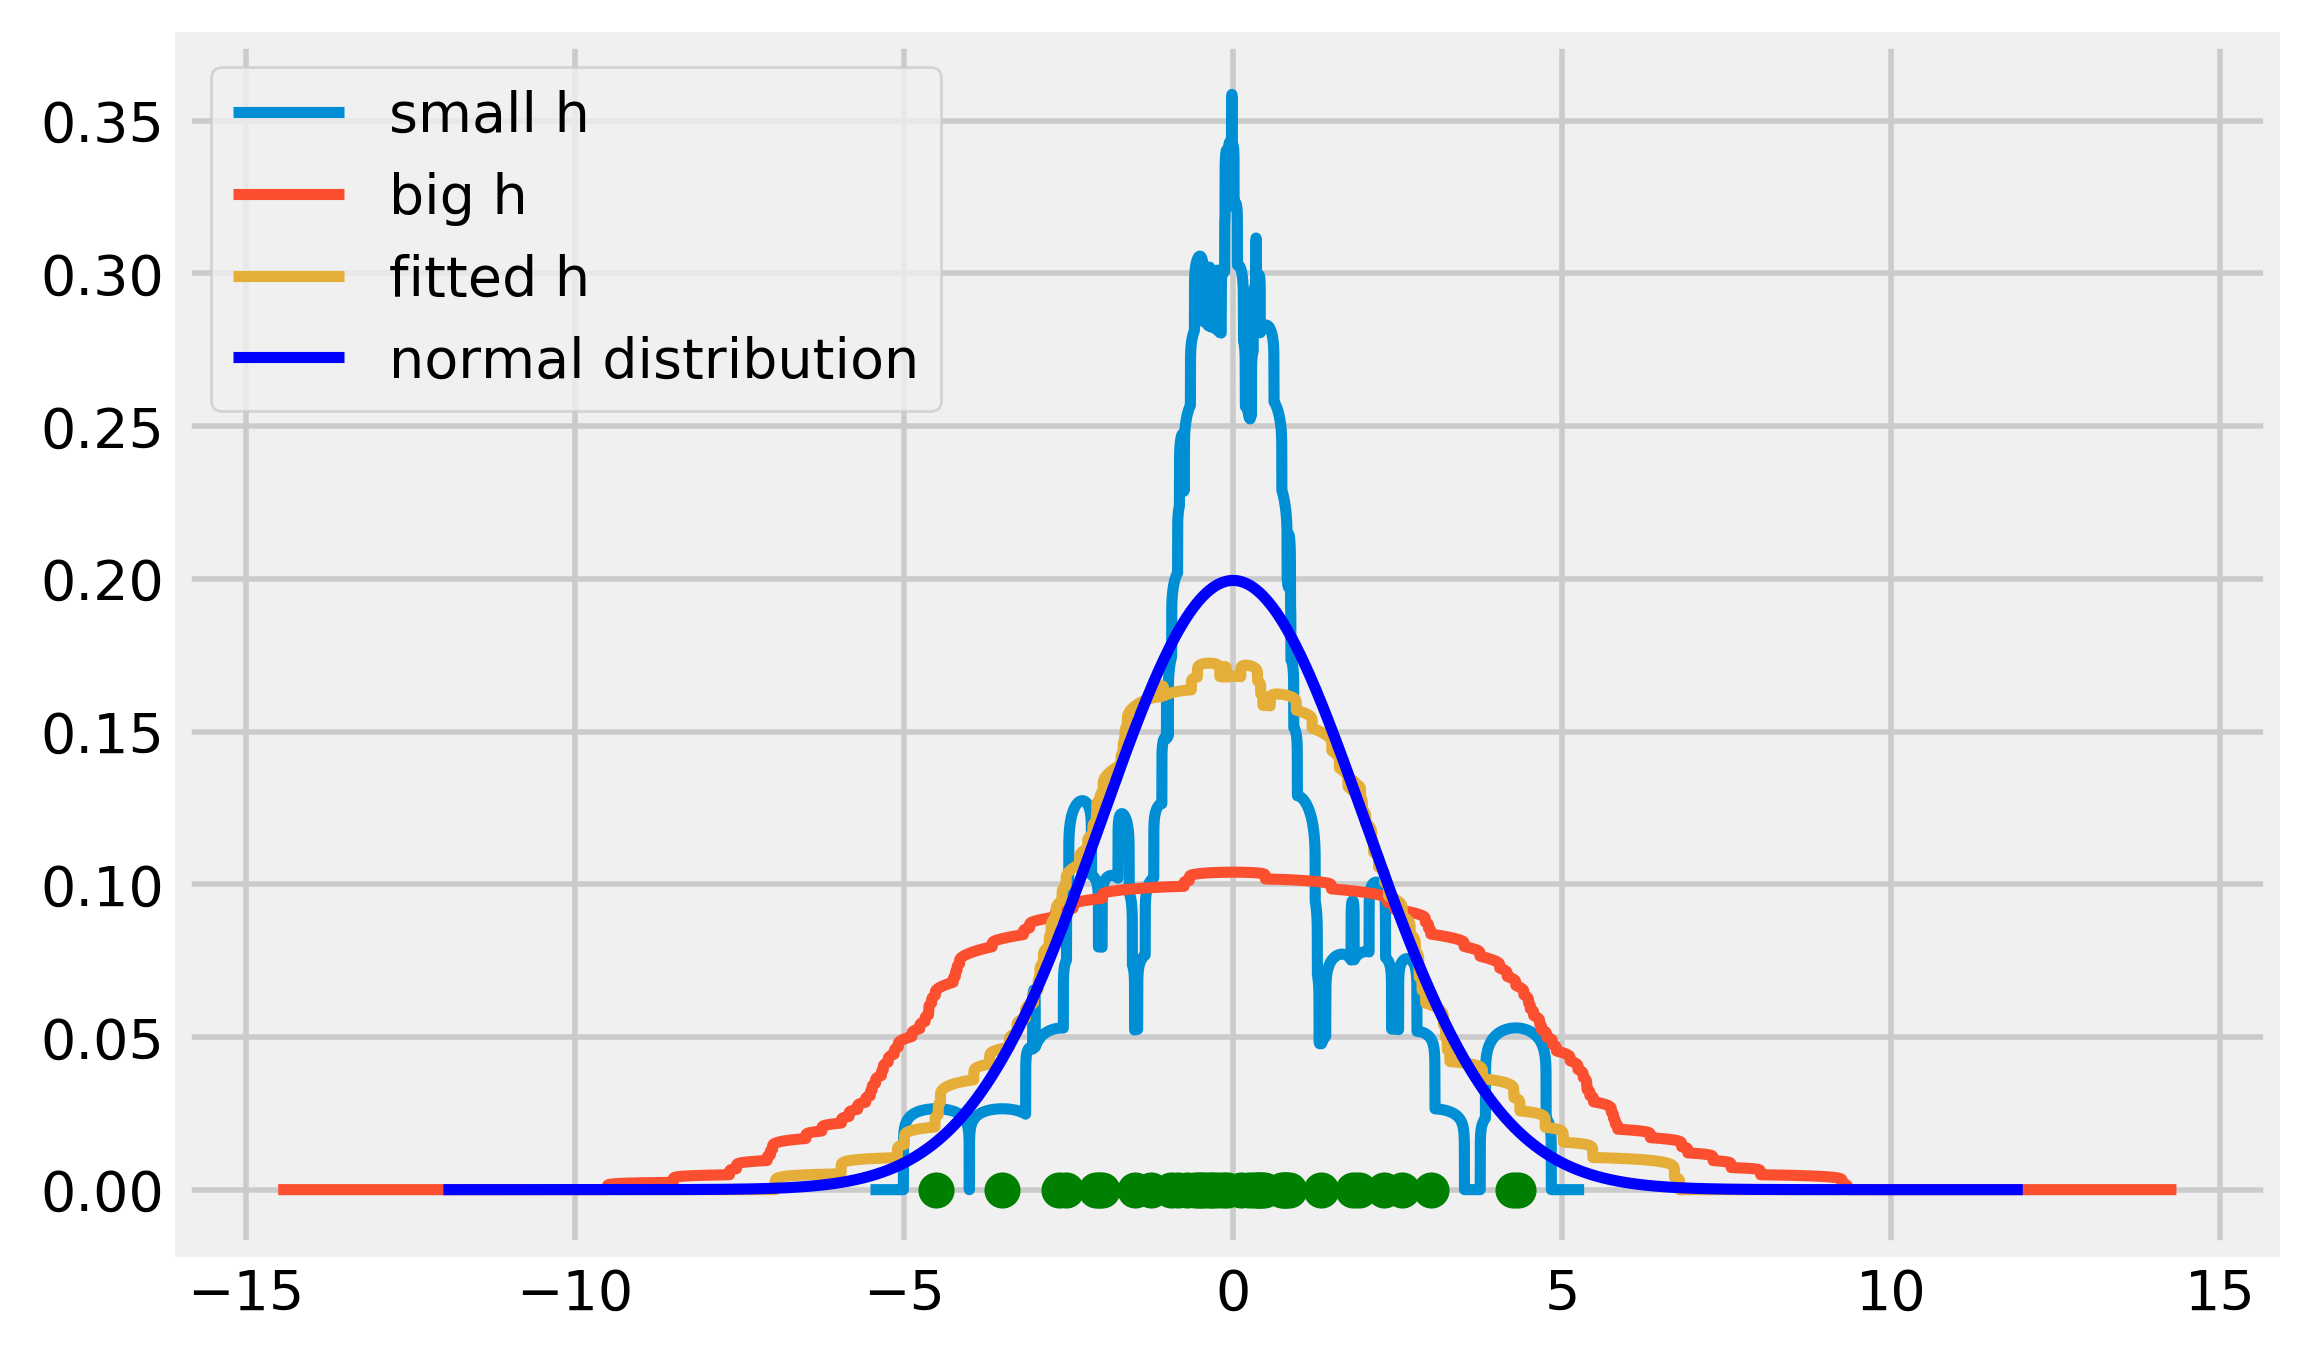

In [37]:
dat1=stats.norm.rvs(loc=0, scale=2, size=40)
datmin = 0 # who cares about the exact value of dat1.min()
datmax = dat1.max() # definitely care about this

h1=0.5 # small
h2=5 # too big
h3=2.45 # right value
f1 = putabumponit(dat1, h1,"small h")
f2 = putabumponit(dat1, h2,"big h")
f3 = putabumponit(dat1, h3,"fitted h")

xvec = np.arange(-12, 12, .001)
plt.plot(xvec, stats.norm.pdf(xvec, 0, 2), c='blue',label ="normal distribution",lw=2)
plt.scatter(dat1, 0*dat1, c='green')
plt.legend (loc='upper left')

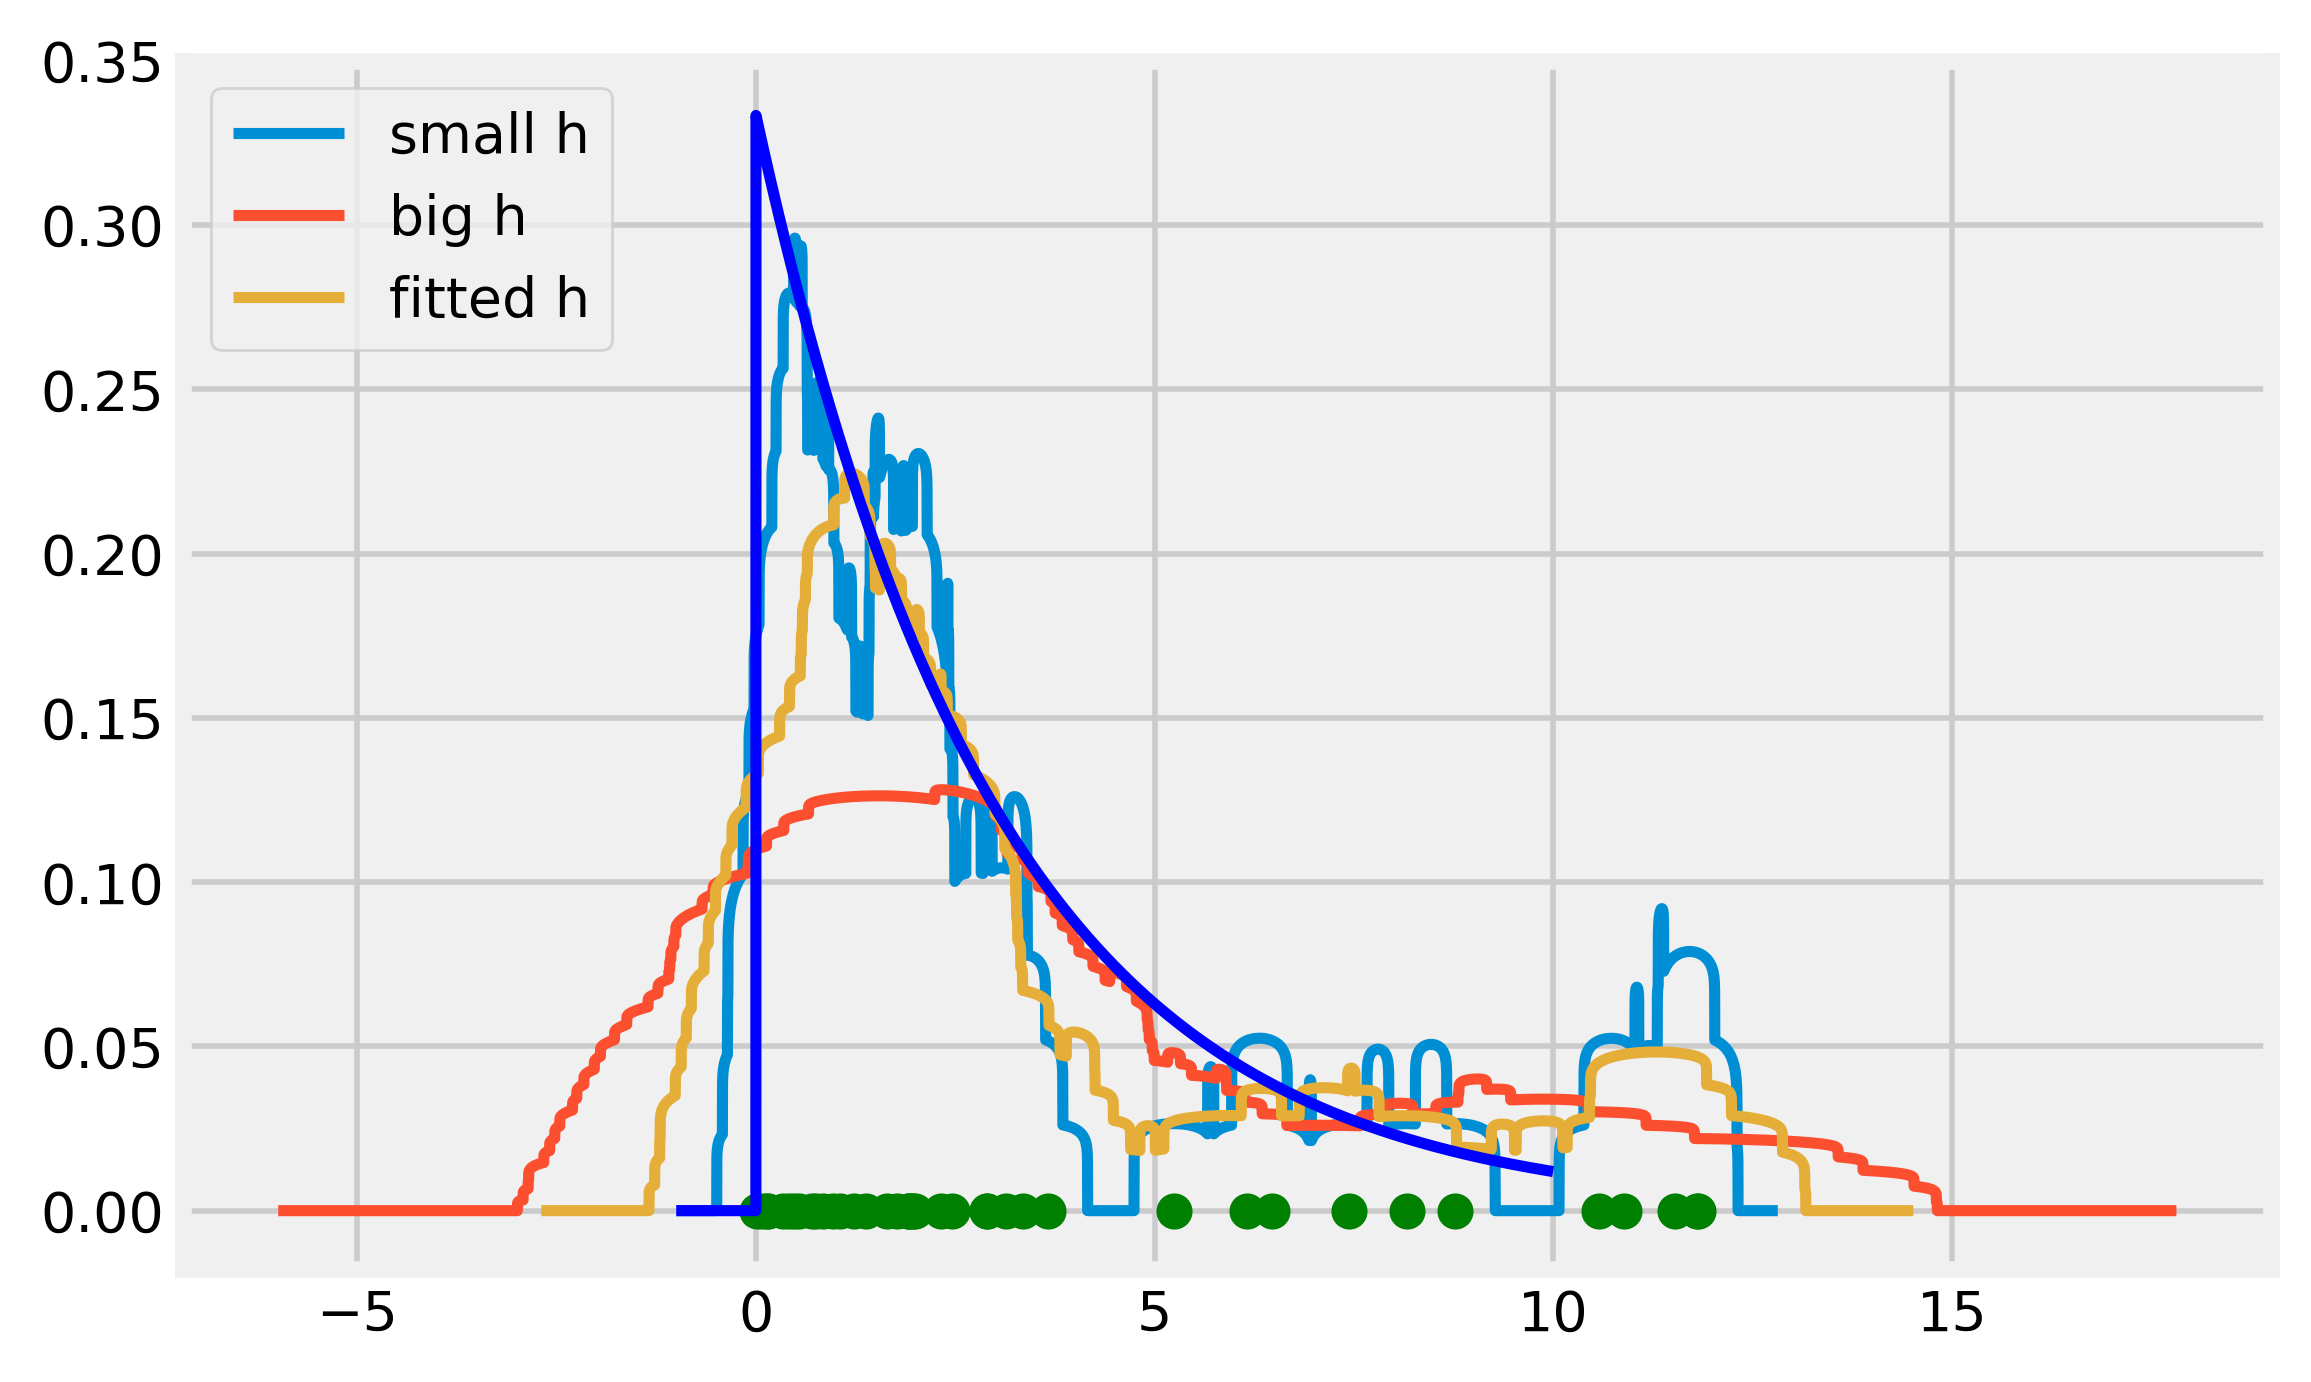

In [38]:
dat2=stats.expon.rvs(loc=0, scale=3, size=40)
datmin = dat2.min()
datmax = dat2.max() # definitely care about this

h1=0.5 # small
h2=3# too big
h3=1.35 # fitted h
f1 = putabumponit(dat2, h1,"small h")
f2 = putabumponit(dat2, h2,"big h")
f3 = putabumponit(dat2, h3,"fitted h")

xvec = np.arange(-1, 10, .001)
plt.plot(xvec, stats.expon.pdf(xvec, 0, 3), c='blue',lw=2)
plt.legend (loc='upper left')
plt.scatter(dat2, 0*dat2, c='green')

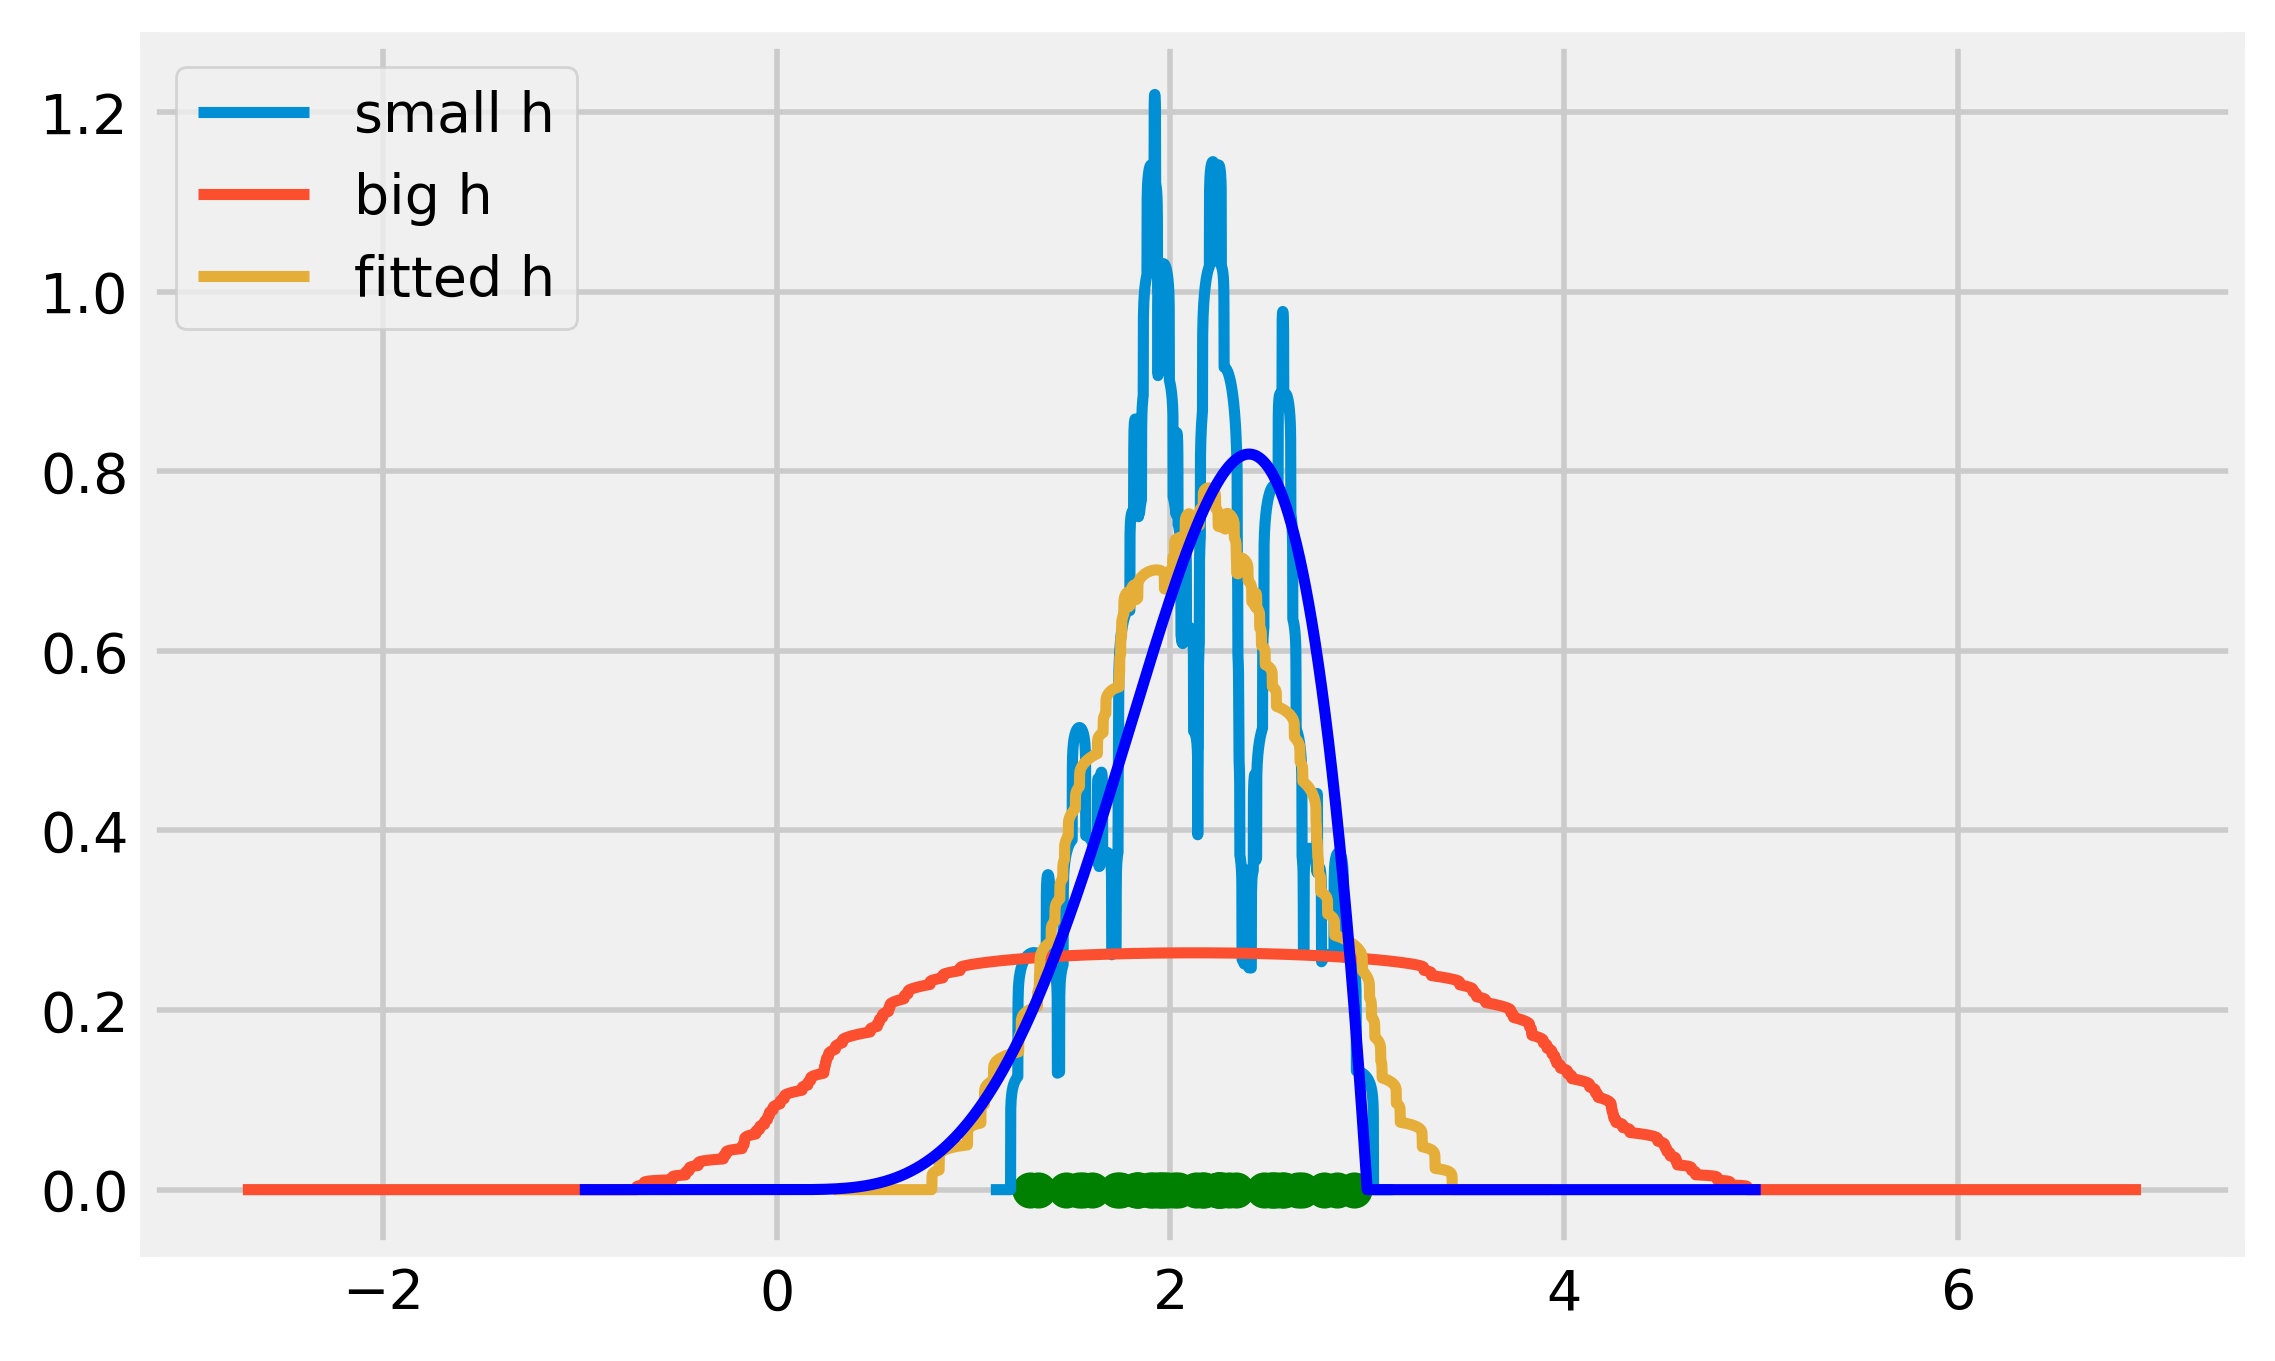

In [40]:
dat3=stats.beta.rvs(5,2,loc=0, scale=3, size=40)
datmin = dat3.min()
datmax = dat3.max() # definitely care about this

h1=0.1 # small
h2=2 # big
h3=0.5 # right value

f1 = putabumponit(dat3, h1,"small h")
f2 = putabumponit(dat3, h2,"big h")
f3 = putabumponit(dat3, h3,"fitted h")

xvec = np.arange(-1, 5, .001)
plt.plot(xvec, stats.beta.pdf(xvec,5,2, 0, 3), c='blue',lw=2)
plt.legend (loc='upper left')
plt.scatter(dat3, 0*dat3, c='green')